In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX


In [38]:
df_daily  = pd.read_csv('daily_df.csv')
df_daily['Datetime'] = pd.to_datetime(df_daily['Datetime'])
df_daily.set_index('Datetime', inplace=True)
df_daily

Temperature (°C)  Precipitations (mm)  Wind Speed (m/s)  \
Datetime                                                              
2016-01-01          5.508333             0.020833          3.700000   
2016-01-02          3.837500             0.008333          5.225000   
2016-01-03          5.766667             0.000000          4.404167   
2016-01-04          4.995833             0.029167          4.037500   
2016-01-05          6.208333             0.083333          3.758333   
...                      ...                  ...               ...   
2022-12-27          4.783333             0.000000          4.958333   
2022-12-28          8.858333             0.000000          5.879167   
2022-12-29          9.870833             0.012500          5.762500   
2022-12-30          8.508333             0.016667          5.862500   
2022-12-31         15.795833             0.000000          6.800000   

            KennedyBrücke  NordBrücke  SüdBrücke  Estermannufer  VonSandtUfer  \
Datetime                                                                        
2016-01-01         1817.0       487.0      795.0          190.0         536.0   
2016-01-02         1587.0       133.0      241.0           31.0         167.0   
2016-01-03         1858.0       384.0      697.0          164.0         556.0   
2016-01-04         4020.0       349.0     1243.0          107.0         478.0   
2016-01-05         5221.0       524.0     1656.0          198.0         710.0   
...                   ...         ...        ...            ...           ...   
2022-12-27         4270.0       764.0      543.0          269.0         710.0   
2022-12-28         3927.0       534.0      418.0          226.0         552.0   
2022-12-29         4281.0       613.0      527.0          220.0         567.0   
2022-12-30         3654.0       429.0      346.0          129.0         410.0   
2022-12-31         3031.0       543.0      494.0          224.0         680.0   

            Rhenusallee  BrühlerStraße  WilhelmSpiritusUfer  McCloyWeg  \
Datetime                                                                 
2016-01-01        767.0          216.0                  0.0        0.0   
2016-01-02        184.0          199.0                  0.0        0.0   
2016-01-03        679.0          214.0                  0.0        0.0   
2016-01-04        650.0          474.0                  0.0        0.0   
2016-01-05        871.0          654.0                  0.0        0.0   
...                 ...            ...                  ...        ...   
2022-12-27          0.0          556.0               1096.0      563.0   
2022-12-28          0.0          484.0                916.0      401.0   
2022-12-29          0.0          478.0                993.0      435.0   
2022-12-30          0.0          477.0                683.0      299.0   
2022-12-31          0.0          374.0                833.0      618.0   

            WegDammBonnBeuel  
Datetime                      
2016-01-01               0.0  
2016-01-02               0.0  
2016-01-03               0.0  
2016-01-04               0.0  
2016-01-05               0.0  
...                      ...  
2022-12-27            1078.0  
2022-12-28             757.0  
2022-12-29             894.0  
2022-12-30             644.0  
2022-12-31            1022.0  

[2557 rows x 13 columns]

In [39]:
columns_to_sum = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']

df_daily['Bonn'] = df_daily[columns_to_sum].sum(axis=1)
df_daily


Temperature (°C)  Precipitations (mm)  Wind Speed (m/s)  \
Datetime                                                              
2016-01-01          5.508333             0.020833          3.700000   
2016-01-02          3.837500             0.008333          5.225000   
2016-01-03          5.766667             0.000000          4.404167   
2016-01-04          4.995833             0.029167          4.037500   
2016-01-05          6.208333             0.083333          3.758333   
...                      ...                  ...               ...   
2022-12-27          4.783333             0.000000          4.958333   
2022-12-28          8.858333             0.000000          5.879167   
2022-12-29          9.870833             0.012500          5.762500   
2022-12-30          8.508333             0.016667          5.862500   
2022-12-31         15.795833             0.000000          6.800000   

            KennedyBrücke  NordBrücke  SüdBrücke  Estermannufer  VonSandtUfer  \
Datetime                                                                        
2016-01-01         1817.0       487.0      795.0          190.0         536.0   
2016-01-02         1587.0       133.0      241.0           31.0         167.0   
2016-01-03         1858.0       384.0      697.0          164.0         556.0   
2016-01-04         4020.0       349.0     1243.0          107.0         478.0   
2016-01-05         5221.0       524.0     1656.0          198.0         710.0   
...                   ...         ...        ...            ...           ...   
2022-12-27         4270.0       764.0      543.0          269.0         710.0   
2022-12-28         3927.0       534.0      418.0          226.0         552.0   
2022-12-29         4281.0       613.0      527.0          220.0         567.0   
2022-12-30         3654.0       429.0      346.0          129.0         410.0   
2022-12-31         3031.0       543.0      494.0          224.0         680.0   

            Rhenusallee  BrühlerStraße  WilhelmSpiritusUfer  McCloyWeg  \
Datetime                                                                 
2016-01-01        767.0          216.0                  0.0        0.0   
2016-01-02        184.0          199.0                  0.0        0.0   
2016-01-03        679.0          214.0                  0.0        0.0   
2016-01-04        650.0          474.0                  0.0        0.0   
2016-01-05        871.0          654.0                  0.0        0.0   
...                 ...            ...                  ...        ...   
2022-12-27          0.0          556.0               1096.0      563.0   
2022-12-28          0.0          484.0                916.0      401.0   
2022-12-29          0.0          478.0                993.0      435.0   
2022-12-30          0.0          477.0                683.0      299.0   
2022-12-31          0.0          374.0                833.0      618.0   

            WegDammBonnBeuel    Bonn  
Datetime                              
2016-01-01               0.0  4808.0  
2016-01-02               0.0  2542.0  
2016-01-03               0.0  4552.0  
2016-01-04               0.0  7321.0  
2016-01-05               0.0  9834.0  
...                      ...     ...  
2022-12-27            1078.0  9849.0  
2022-12-28             757.0  8215.0  
2022-12-29             894.0  9008.0  
2022-12-30             644.0  7071.0  
2022-12-31            1022.0  7819.0  

[2557 rows x 14 columns]

In [101]:
train_end = pd.to_datetime('2021-12-31 23:00:00')
test_start = pd.to_datetime('2022-01-01 00:00:00')

train_data = df_daily.loc[df_daily.index <= train_end]
test_data = df_daily.loc[df_daily.index >= test_start]

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


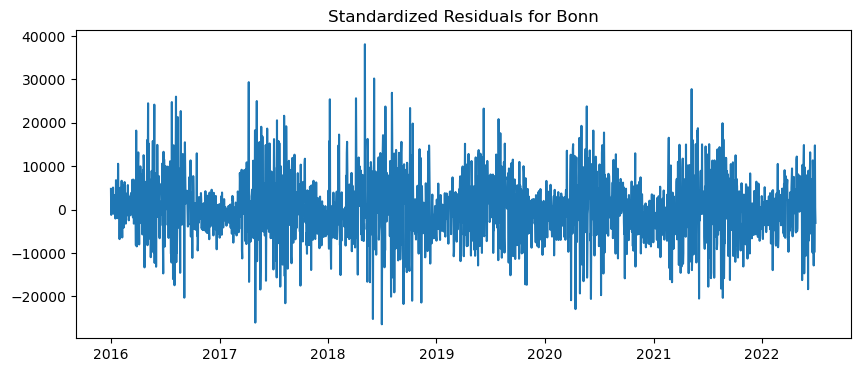

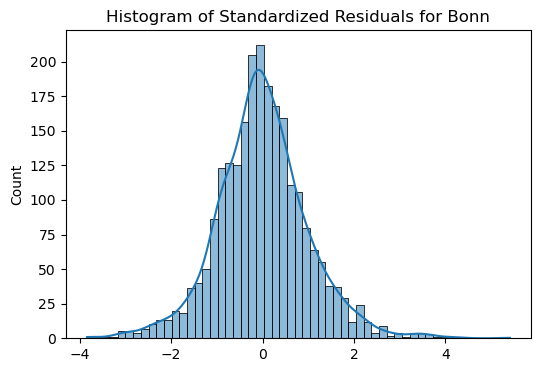

In [102]:
location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']
exog_variables = ['Temperature (°C)']

results_dict = {}

locations_to_process = ['Bonn']

for specific_location in locations_to_process:

    original_data = train_data[specific_location]


    
    model = sm.tsa.SARIMAX(original_data, order=(1, 0, 1), seasonal_order=(1, 0, 1, 7), exog=train_data[exog_variables])
    results = model.fit()

    # in-sample residuals
    residuals = results.resid
    
    # Standardizing
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    # results
    results_dict[specific_location] = {
        'model_results': results,
        'standardized_residuals': std_residuals
    }

In [105]:
forecasted_values_series_aligned = forecasted_values_series.reindex(test_data[specific_location].index)


actual_values_aligned = test_data[specific_location].dropna()
forecasted_values_series_aligned = forecasted_values_series_aligned.dropna()

mae = mean_absolute_error(actual_values_aligned, forecasted_values_series_aligned)
print(f'The Mean Absolute Error (MAE) of our forecasts is {mae}')

rmse = sqrt(mean_squared_error(actual_values_aligned, forecasted_values_series_aligned))
print(f'The Root Mean Squared Error (RMSE) of our forecasts is {rmse}')


actual_values_aligned = actual_values_aligned.replace(0, np.nan)
mdape = np.median(np.abs((actual_values_aligned - forecasted_values_series_aligned) / actual_values_aligned).dropna())
print(f'The Median AbSsolute Percentage Error (MdAPE) of our forecasts is {mdape:.2%}')


The Mean Absolute Error (MAE) of our forecasts is 6977.283203946686
The Root Mean Squared Error (RMSE) of our forecasts is 8296.402327892716
The Median Absolute Percentage Error (MdAPE) of our forecasts is 27.91%


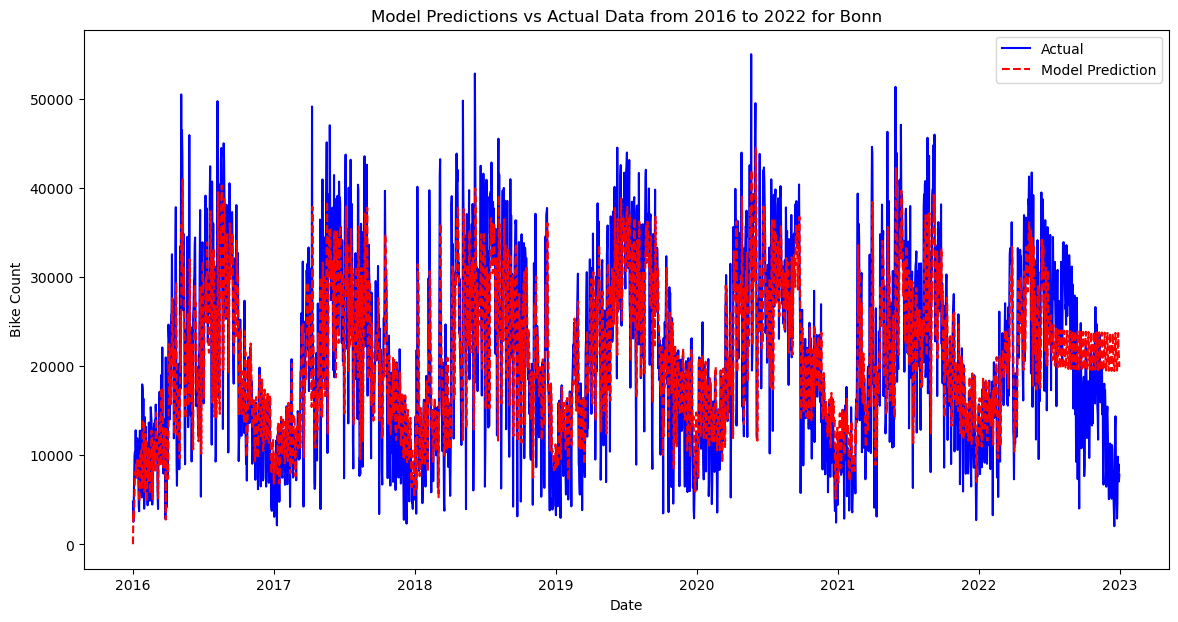

In [97]:

in_sample_preds = model_results.get_prediction(start=train_data.index[0], end=train_data.index[-1], dynamic=False)
in_sample_preds_series = in_sample_preds.predicted_mean


out_of_sample_forecast = model_results.get_forecast(steps=len(test_data), exog=test_data[exog_variables])
out_of_sample_forecast_series = out_of_sample_forecast.predicted_mean


full_prediction_series = pd.concat([in_sample_preds_series, out_of_sample_forecast_series])


full_actual_series = pd.concat([train_data['Bonn'], test_data['Bonn']])


plt.figure(figsize=(14, 7))
plt.plot(full_actual_series.index, full_actual_series, label='Actual', color='blue')
plt.plot(full_prediction_series.index, full_prediction_series, label='Model Prediction', color='red', linestyle='--')
plt.title('Model Predictions vs Actual Data from 2016 to 2022 for Bonn')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.show()

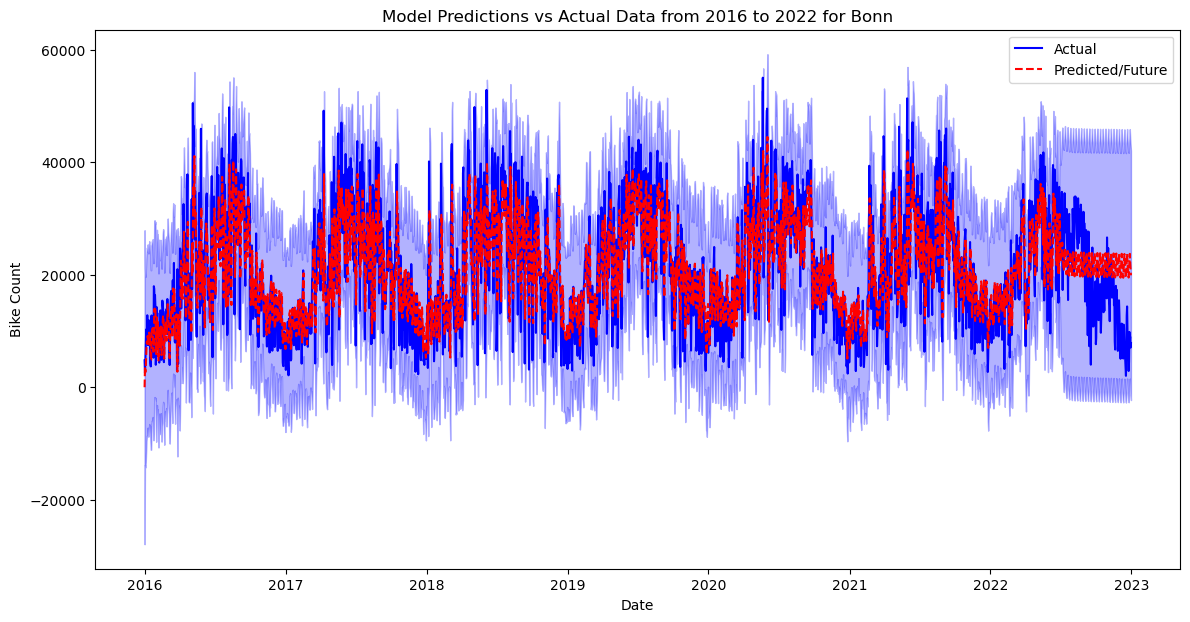

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

in_sample_preds = model_results.get_prediction(start=train_data.index[0], end=train_data.index[-1])
in_sample_preds_series = in_sample_preds.predicted_mean
in_sample_conf_int = in_sample_preds.conf_int()


out_of_sample_forecast = model_results.get_forecast(steps=len(test_data), exog=test_data[exog_variables])
out_of_sample_forecast_series = out_of_sample_forecast.predicted_mean
out_of_sample_conf_int = out_of_sample_forecast.conf_int()


full_pred_series = pd.concat([in_sample_preds_series, out_of_sample_forecast_series])
full_conf_int = pd.concat([in_sample_conf_int, out_of_sample_conf_int])


full_actual_series = pd.concat([train_data['Bonn'], test_data['Bonn']])

plt.figure(figsize=(14, 7))
plt.plot(full_actual_series.index, full_actual_series, label='Actual', color='blue')
plt.plot(full_pred_series.index, full_pred_series, label='Predicted/Future', color='red', linestyle='--')
plt.fill_between(full_conf_int.index, full_conf_int.iloc[:, 0], full_conf_int.iloc[:, 1], color='blue', alpha=0.3)  # Confidence interval
plt.title('Model Predictions vs Actual Data from 2016 to 2022 for Bonn')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.show()

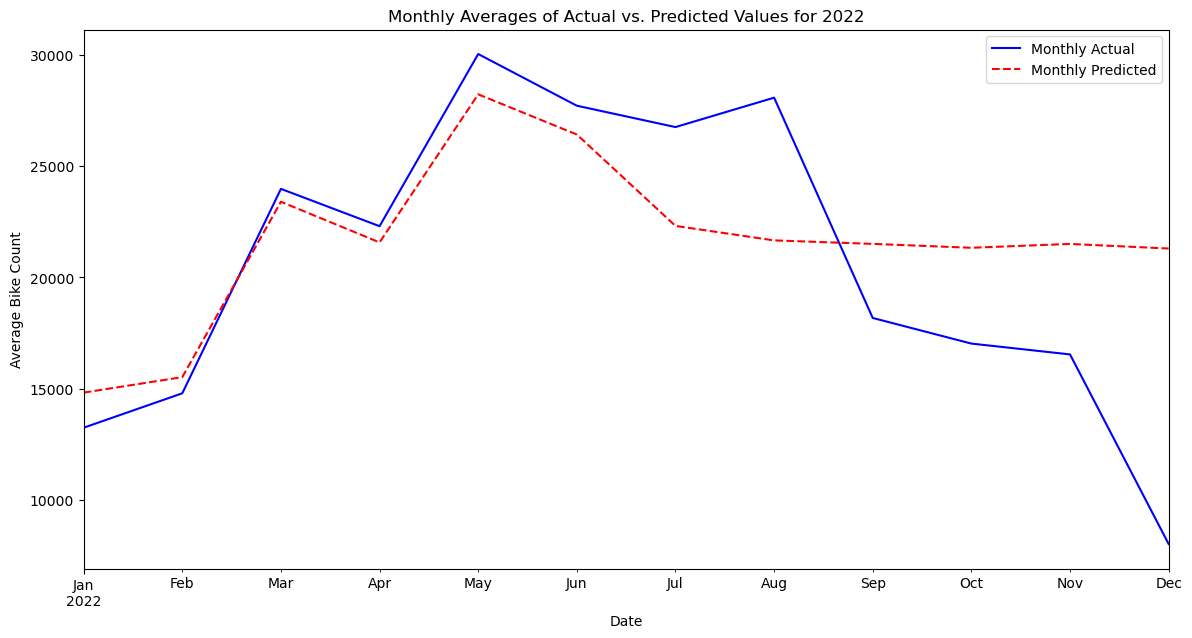

In [104]:
import matplotlib.pyplot as plt


monthly_actual_2022 = full_actual_series['2022'].resample('M').mean()
monthly_predicted_2022 = full_prediction_series['2022'].resample('M').mean()

# year 2022
plt.figure(figsize=(14, 7))
monthly_actual_2022.plot(label='Monthly Actual', color='blue')
monthly_predicted_2022.plot(label='Monthly Predicted', color='red', linestyle='--')
plt.title('Monthly Averages of Actual vs. Predicted Values for 2022')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Bike Count')
plt.xlim([pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31')])  
plt.show()

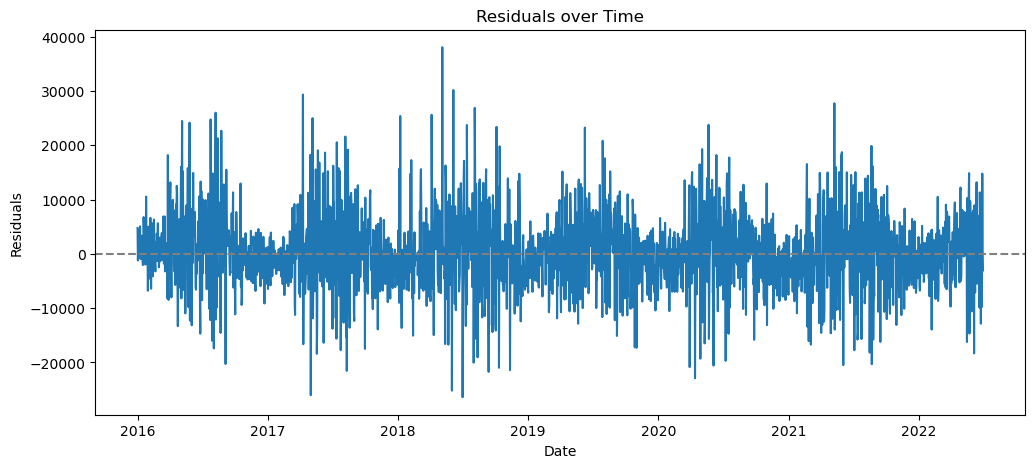

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


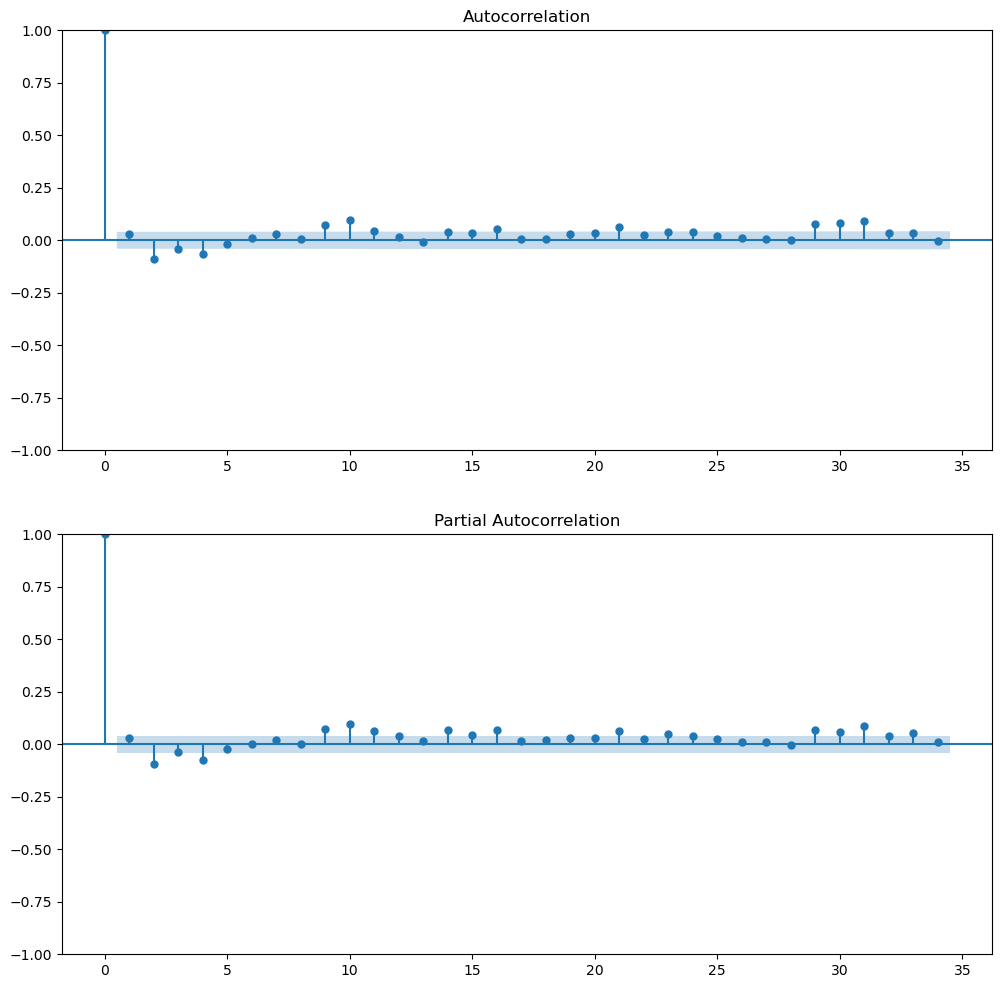

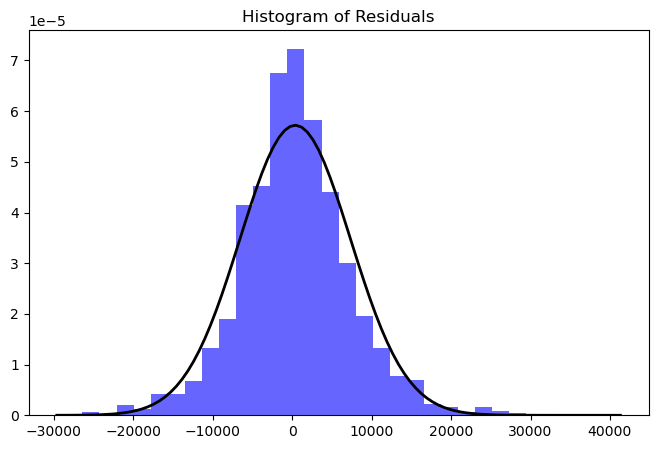

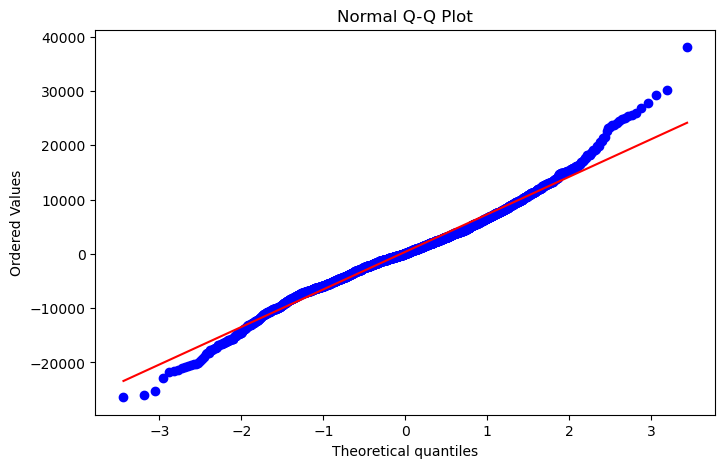

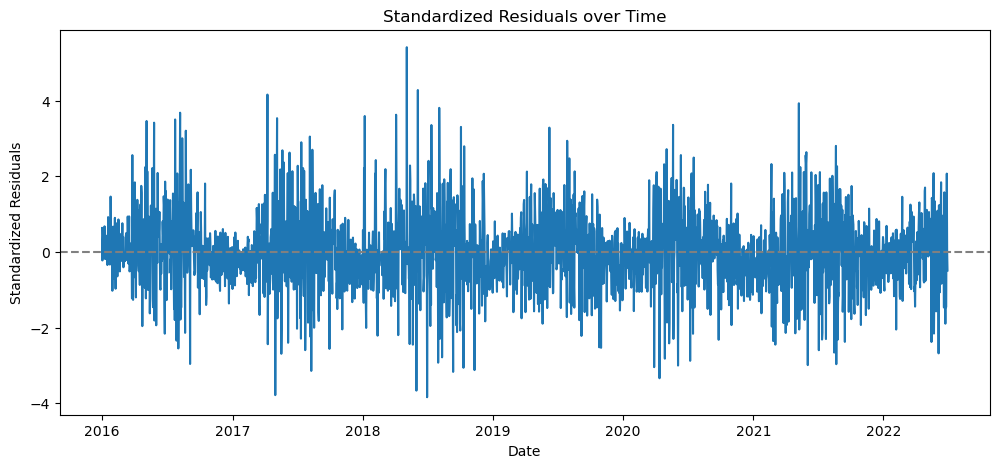

In [106]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats


residuals = model_results.resid

# Residuals Plot
plt.figure(figsize=(12, 5))
plt.plot(residuals)
plt.title('Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='gray')
plt.show()

# ACF and PACF Plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(residuals, ax=ax1)
plot_pacf(residuals, ax=ax2)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='b')

mu, std = stats.norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

# Standardized Residuals over Time
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.figure(figsize=(12, 5))
plt.plot(standardized_residuals)
plt.title('Standardized Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Standardized Residuals')
plt.axhline(0, linestyle='--', color='gray')
plt.show()

#### Per location now:

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


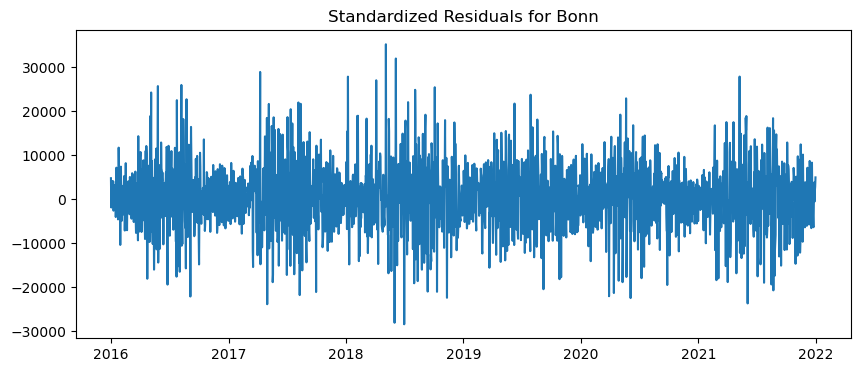

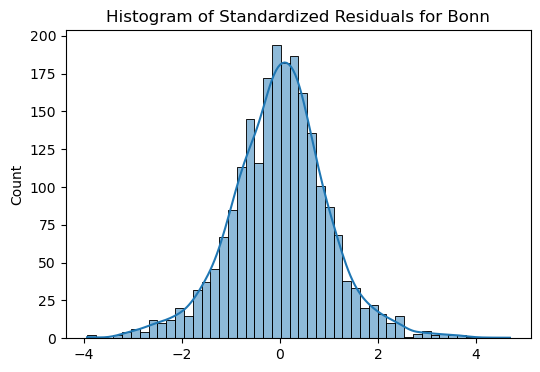

In [23]:
location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']
exog_variables = ['Temperature (°C)','Wind Speed (m/s)','Precipitations (mm)' ]

results_dict = {}

locations_to_process = ['Bonn']

for specific_location in locations_to_process:

    original_data = train_data[specific_location]

    model = sm.tsa.SARIMAX(original_data, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=train_data[exog_variables])
    results = model.fit()

    # in-sample residuals
    residuals = results.resid
    # Standardizing residuals
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    # results
    results_dict[specific_location] = {
        'model_results': results,
        'standardized_residuals': std_residuals
    }

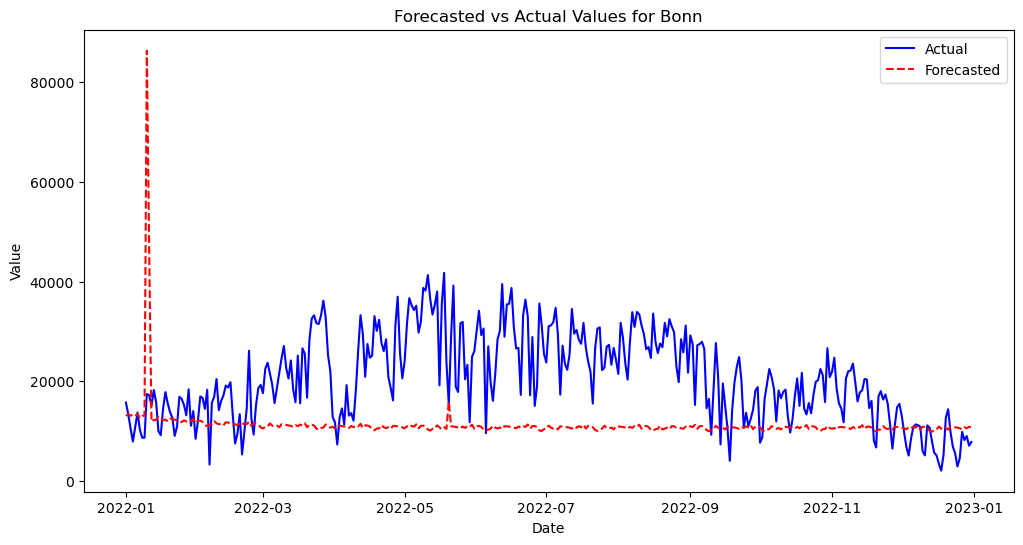

The Root Mean Squared Error of our forecasts is 13692.561042086703


In [24]:
specific_location = 'Bonn'
model_results = results_dict[specific_location]['model_results']

forecasted_values = model_results.get_forecast(steps=len(test_data), exog=test_data[exog_variables])

forecasted_values_series = forecasted_values.predicted_mean


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data[specific_location], label='Actual', color='blue')
plt.plot(test_data.index, forecasted_values_series, label='Forecasted', color='red', linestyle='--')
plt.title(f'Forecasted vs Actual Values for {specific_location}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_data[specific_location], forecasted_values_series))
print(f'The Root Mean Squared Error of our forecasts is {rmse}')

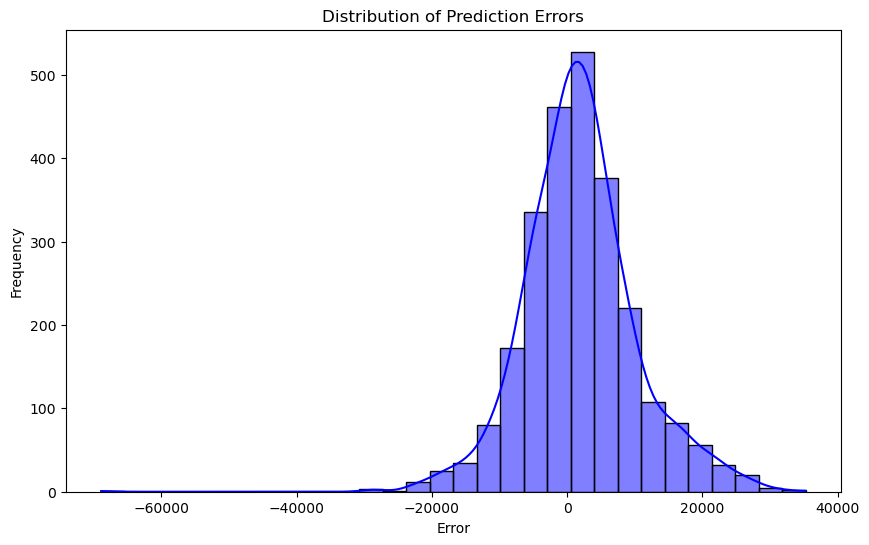

In [28]:
errors = full_actual_series - full_prediction_series
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue', bins=30)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


## Try 2: 

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


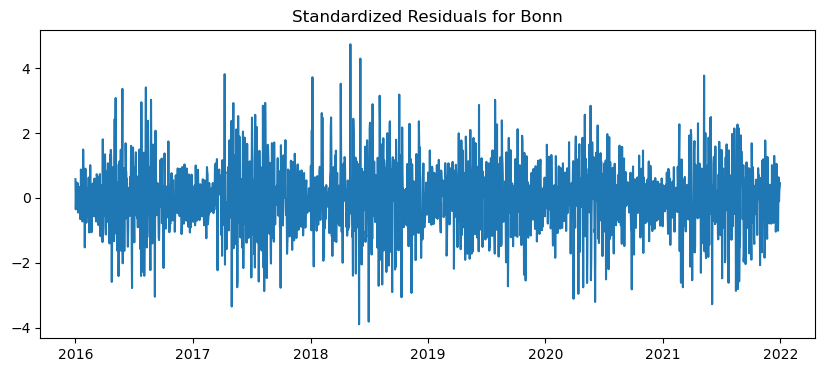

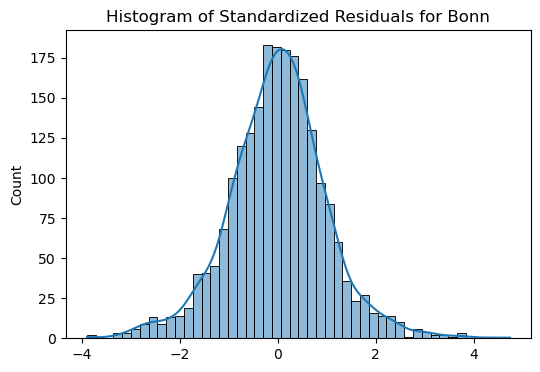

In [21]:
locations_to_process = ['Bonn']

for specific_location in locations_to_process:
    
    transformed_column, lam = boxcox(train_data[specific_location] + 1) 
    
    original_data = train_data[specific_location]

    model = sm.tsa.SARIMAX(original_data, order=(1, 0, 1), seasonal_order=(1, 0, 1, 90), exog=train_data[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        #'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals,
        #'lambda': lam  
    }

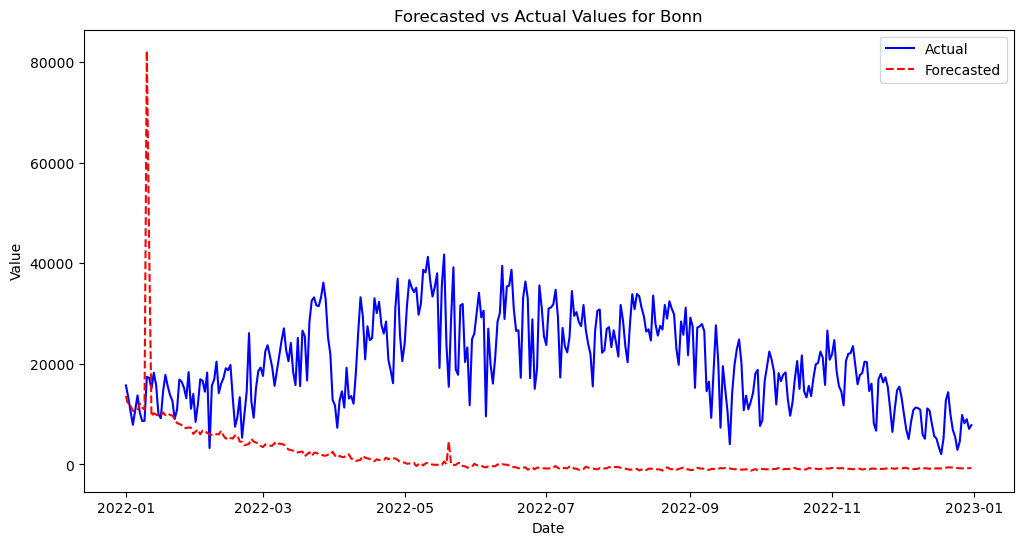

The Root Mean Squared Error of our forecasts is 22223.576703585666


In [22]:
specific_location = 'Bonn'
model_results = results_dict[specific_location]['model_results']


forecasted_values = model_results.get_forecast(steps=len(test_data), exog=test_data[exog_variables])



forecasted_values_series = forecasted_values.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data[specific_location], label='Actual', color='blue')
plt.plot(test_data.index, forecasted_values_series, label='Forecasted', color='red', linestyle='--')
plt.title(f'Forecasted vs Actual Values for {specific_location}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_data[specific_location], forecasted_values_series))
print(f'The Root Mean Squared Error of our forecasts is {rmse}')

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Lik

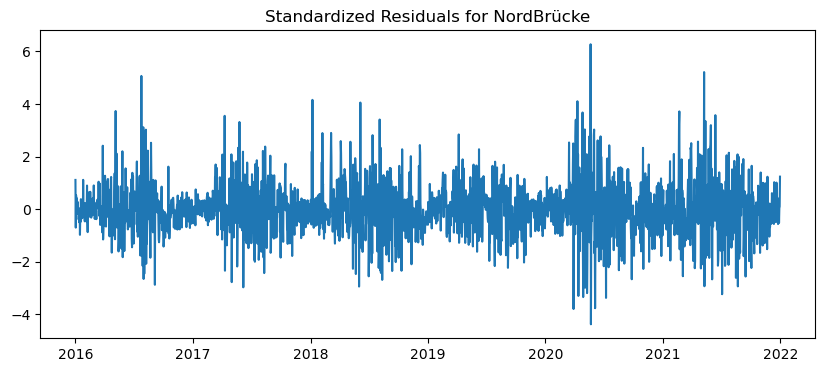

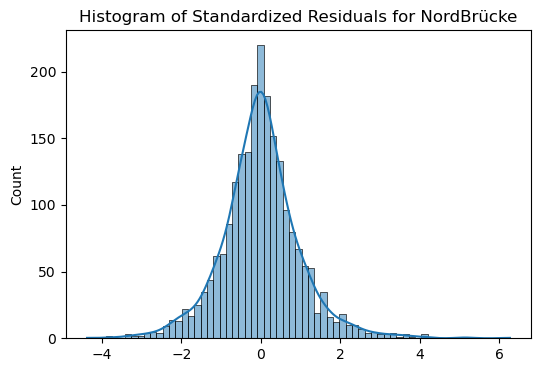

In [14]:
location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']
exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']

results_dict = {}

locations_to_process = ['NordBrücke']

for specific_location in locations_to_process:
   
    original_data = train_data[specific_location]

    model = sm.tsa.SARIMAX(original_data, order=(2, 1, 2), seasonal_order=(2, 1, 2, 7), exog=train_data[exog_variables])
    results = model.fit()


    residuals = results.resid

    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)


    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()


    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()


    results_dict[specific_location] = {
        'model_results': results,
        'standardized_residuals': std_residuals
    }

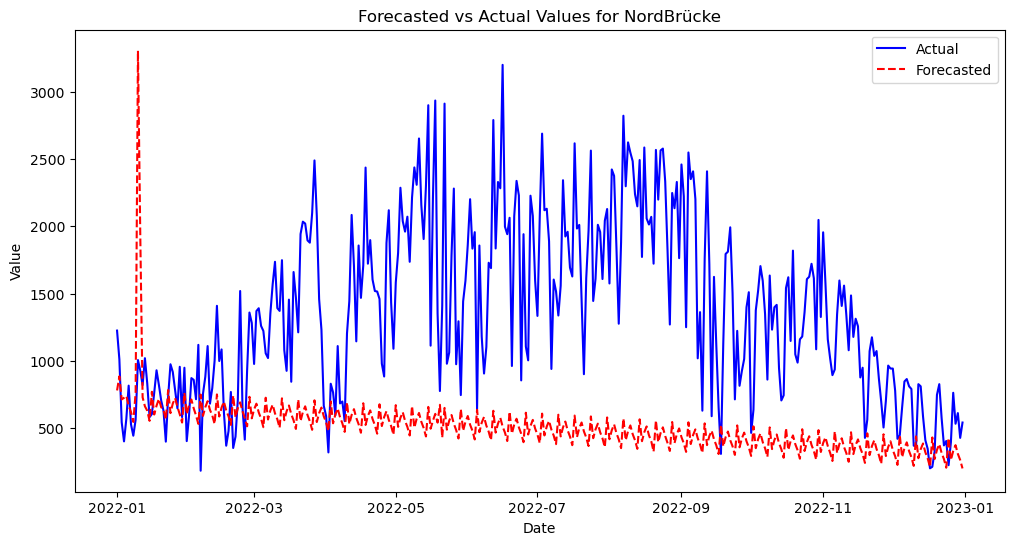

The Root Mean Squared Error of our forecasts is 1102.120691652304


In [22]:
specific_location = 'NordBrücke'
model_results = results_dict[specific_location]['model_results']


forecasted_values = model_results.get_forecast(steps=len(test_data), exog=test_data[exog_variables])

forecasted_values_series = forecasted_values.predicted_mean


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data[specific_location], label='Actual', color='blue')
plt.plot(test_data.index, forecasted_values_series, label='Forecasted', color='red', linestyle='--')
plt.title(f'Forecasted vs Actual Values for {specific_location}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_data[specific_location], forecasted_values_series))
print(f'The Root Mean Squared Error of our forecasts is {rmse}')

In [21]:
# 'KennedyBrücke'
specific_location = 'VonSandtUfer'
model_results = results_dict[specific_location]['model_results']
lam = results_dict[specific_location]['lambda']

forecasted_transformed_values = model_results.forecast(steps=len(test_data), exog=test_data[exog_variables])

In [22]:
def inverse_boxcox(y, lam):
    if lam == 0:
        return np.exp(y) - 1
    else:
        return np.power(lam * y + 1, 1 / lam) - 1

forecasted_original_values = inverse_boxcox(forecasted_transformed_values, lam)

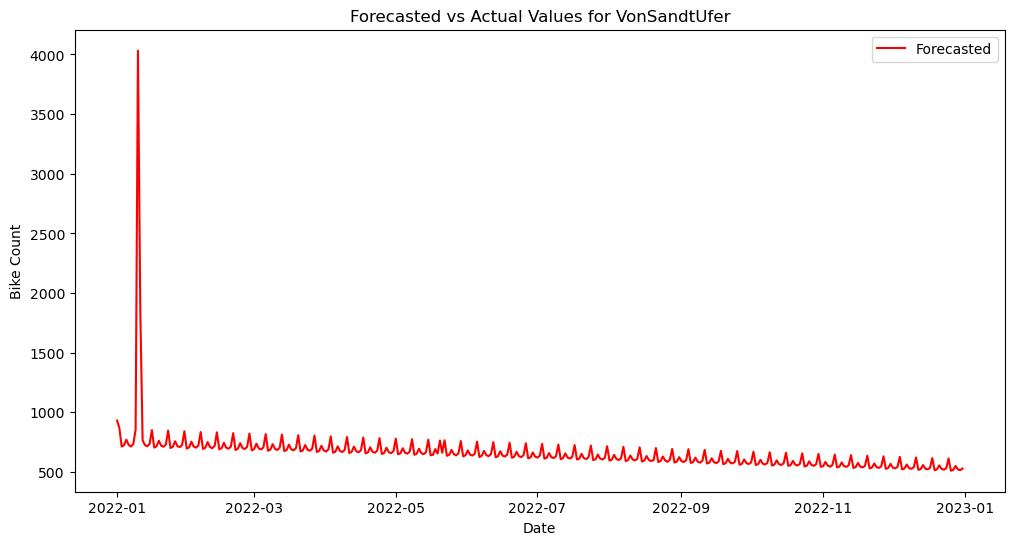

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, forecasted_original_values, label='Forecasted', color='red')

plt.title(f'Forecasted vs Actual Values for {specific_location}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.show()

In [4]:
exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']

def fit_sarimax(location):
    train_data = df_daily['2016-01-01':'2021-12-31']
    model = SARIMAX(train_data[location],
                    exog=train_data[exog_variables],
                    order=(1, 1, 1), 
                    seasonal_order=(1, 1, 1, 12))
    return model.fit(disp=False)

location_models = {}

for location in df_daily.columns.difference(['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']):
    print(f"Fitting SARIMAX model for {location}")
    location_models[location] = fit_sarimax(location)


Fitting SARIMAX model for BrühlerStraße


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Fitting SARIMAX model for Estermannufer


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for KennedyBrücke


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for McCloyWeg


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for NordBrücke


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for Rhenusallee


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for SüdBrücke


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for VonSandtUfer


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for WegDammBonnBeuel


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for WilhelmSpiritusUfer


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostic Plots for BrühlerStraße


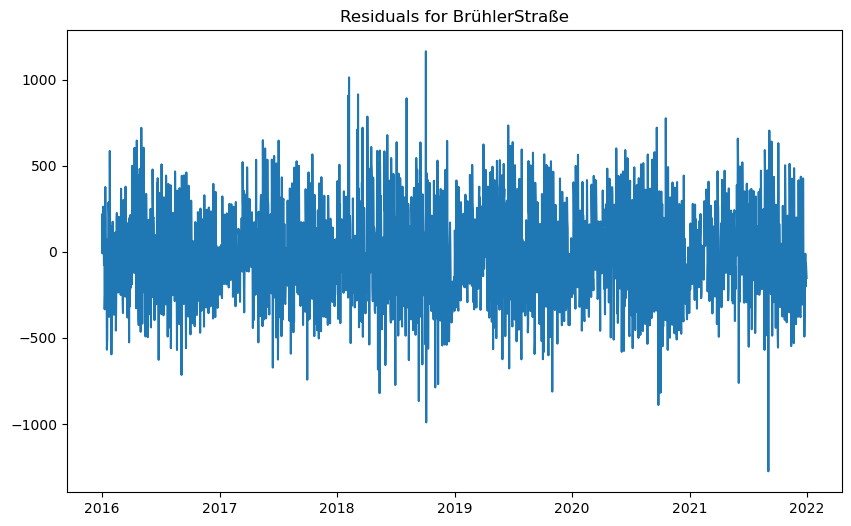

Diagnostic Plots for Estermannufer


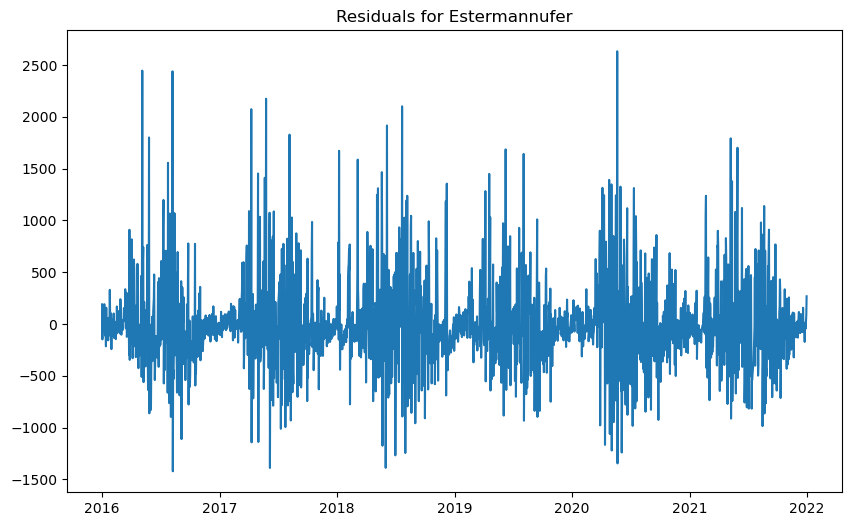

Diagnostic Plots for KennedyBrücke


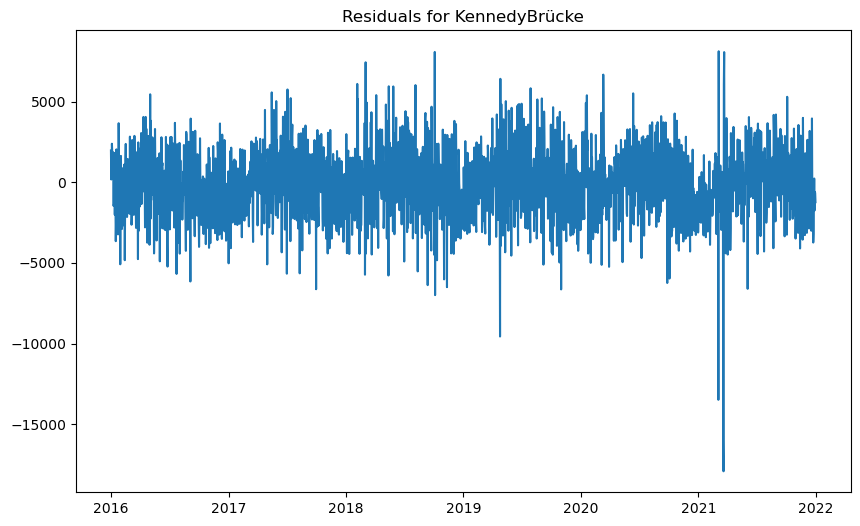

Diagnostic Plots for McCloyWeg


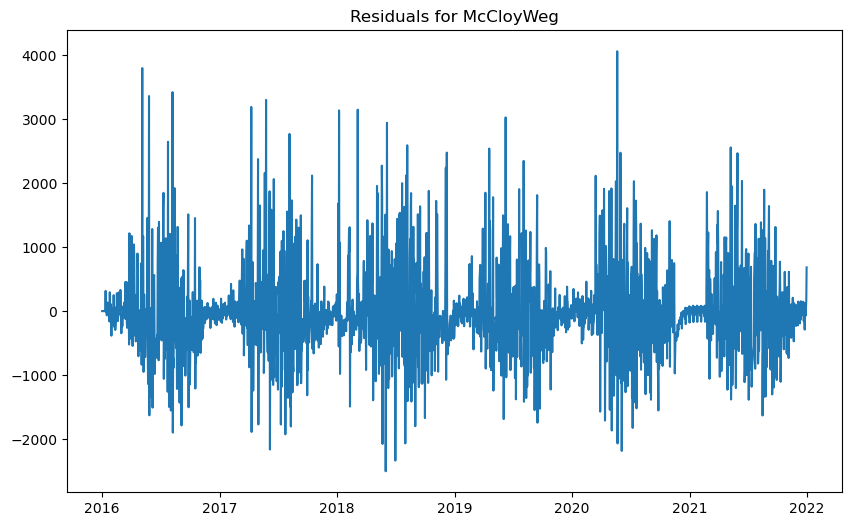

Diagnostic Plots for NordBrücke


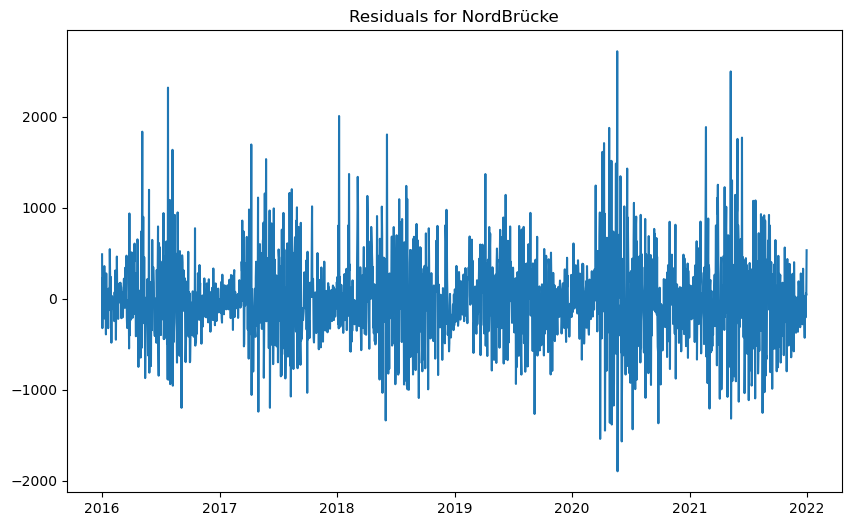

Diagnostic Plots for Rhenusallee


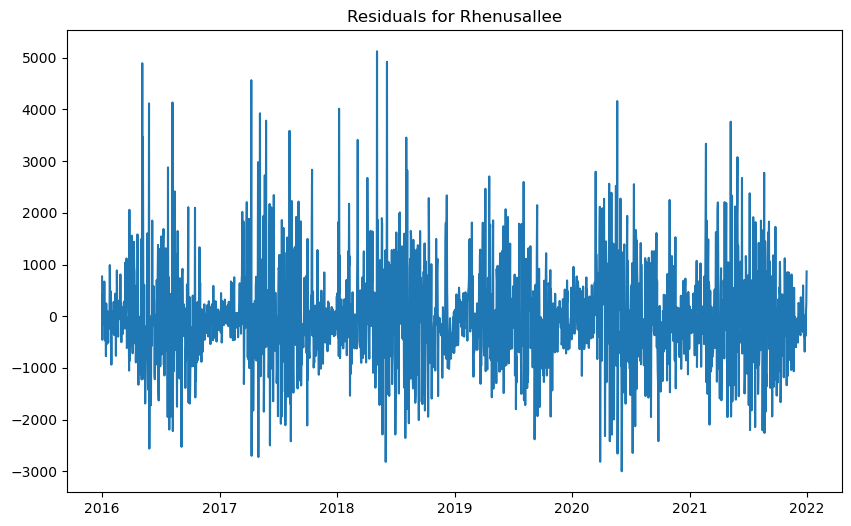

Diagnostic Plots for SüdBrücke


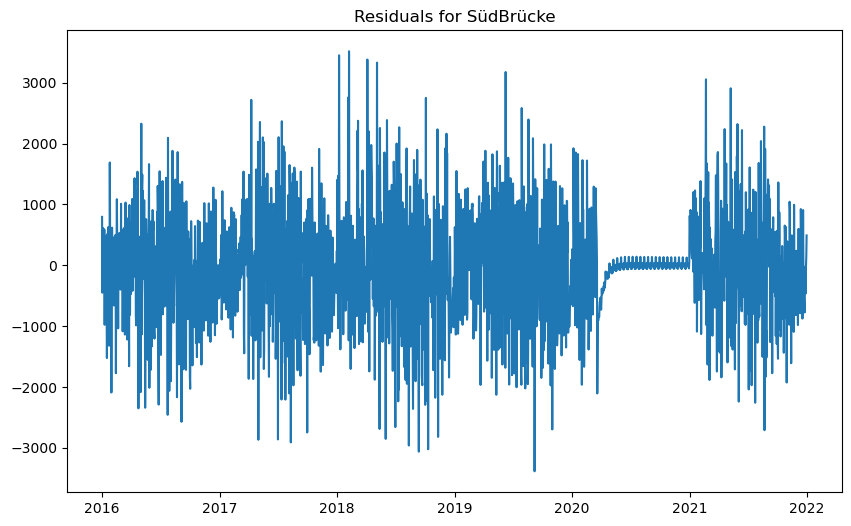

Diagnostic Plots for VonSandtUfer


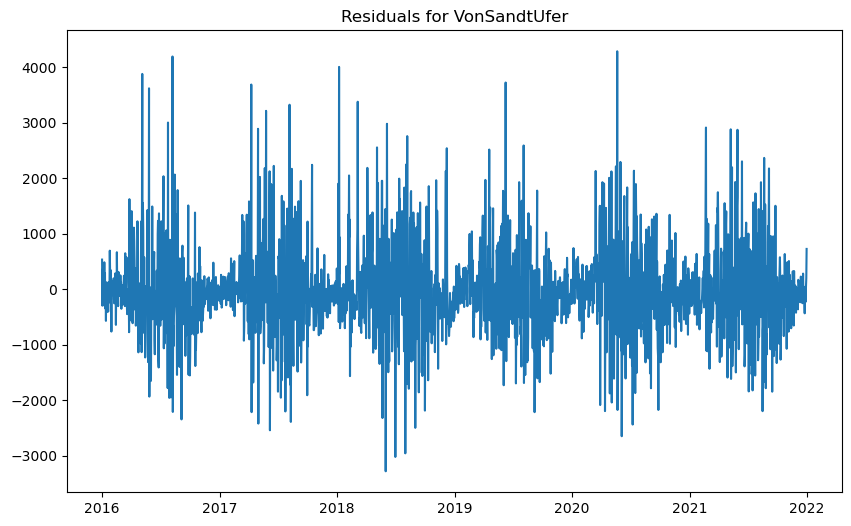

Diagnostic Plots for WegDammBonnBeuel


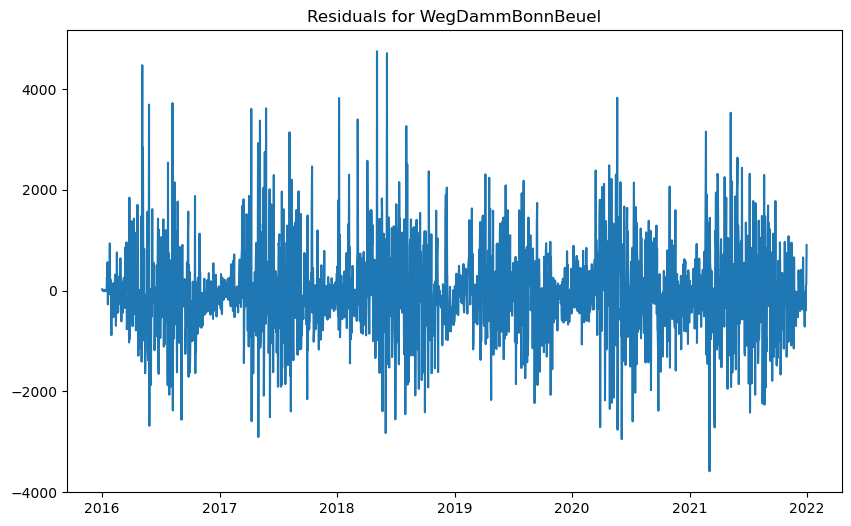

Diagnostic Plots for WilhelmSpiritusUfer


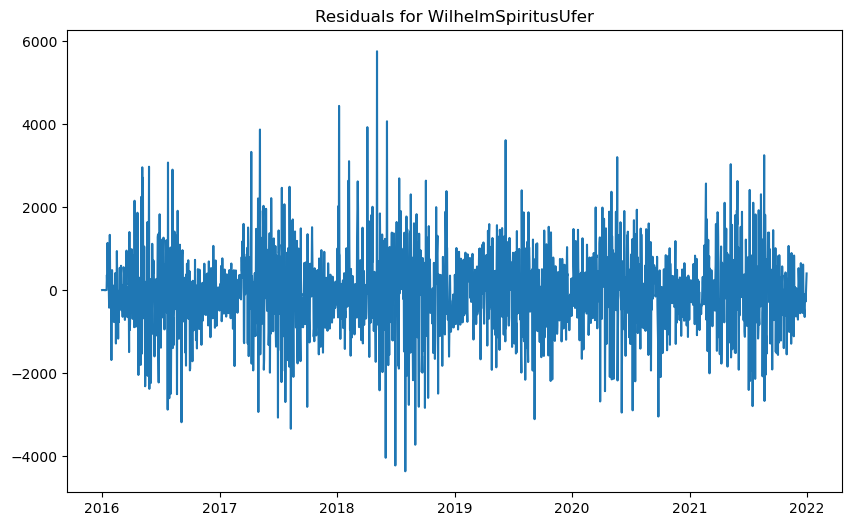

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot

for location, model in location_models.items():
    print(f"Diagnostic Plots for {location}")


    residuals = model.resid
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title(f'Residuals for {location}')
    plt.show()

    

### Diagnosis: 

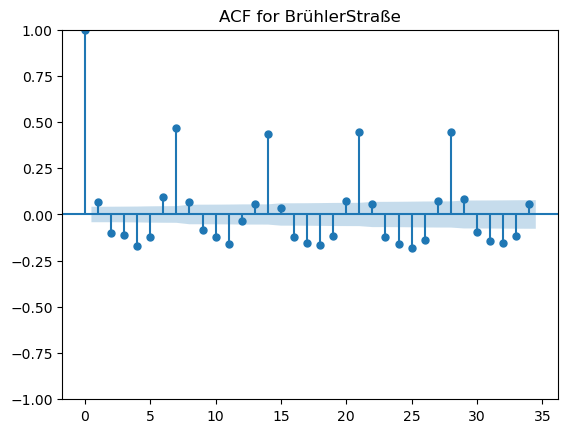

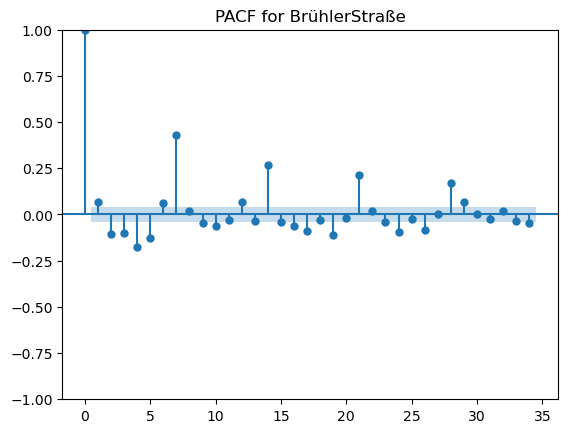

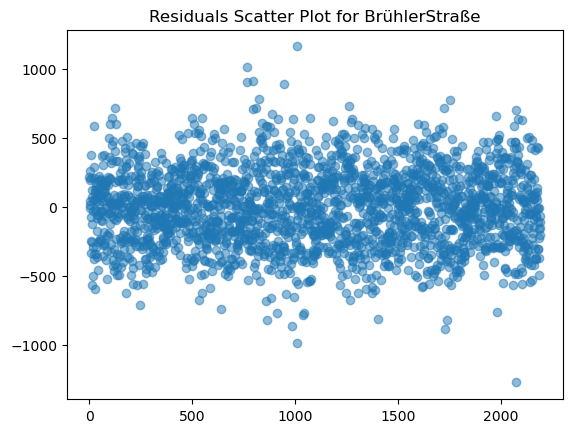

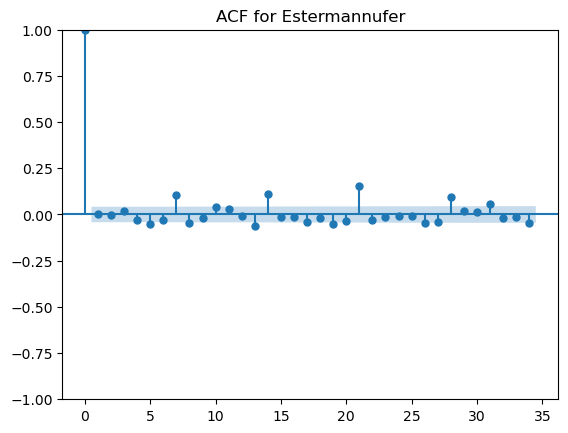

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


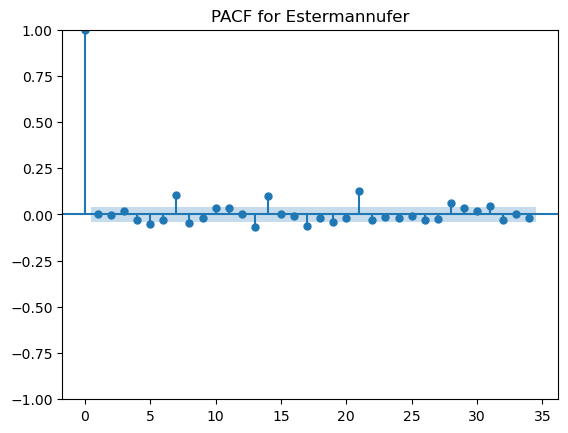

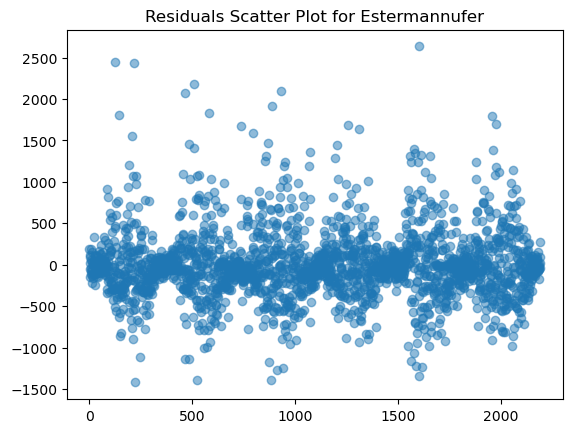

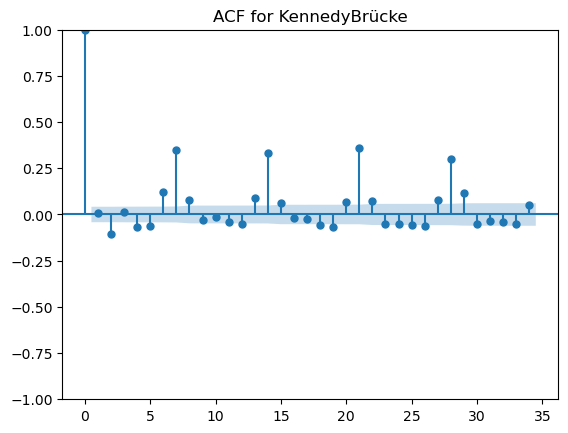

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


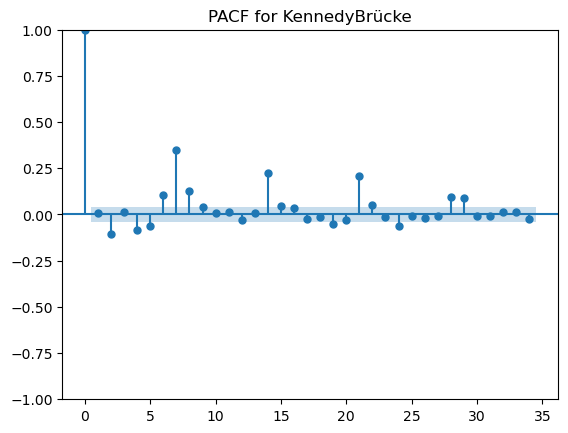

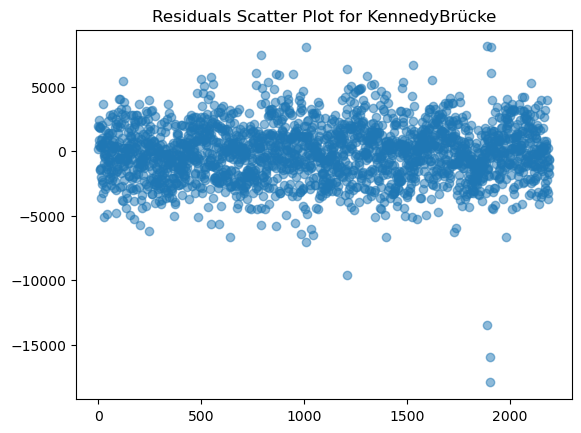

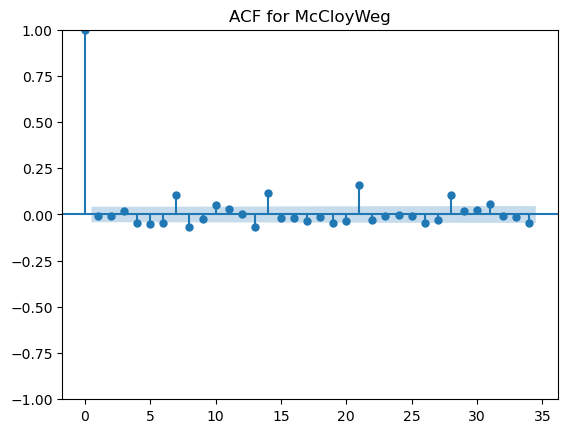

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


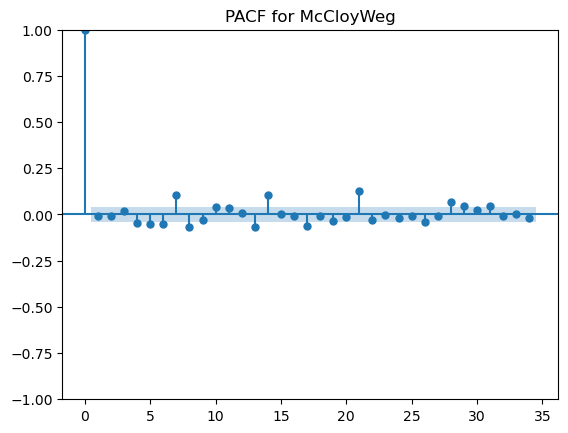

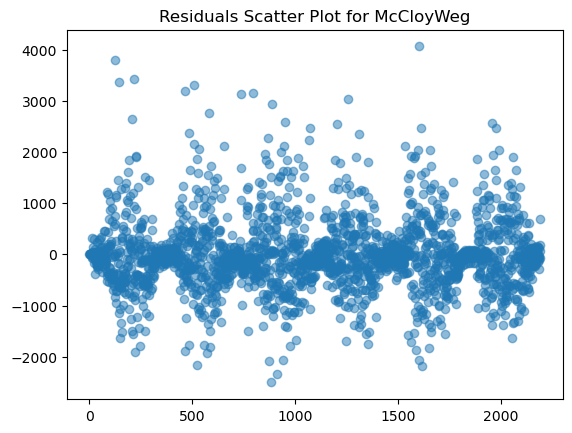

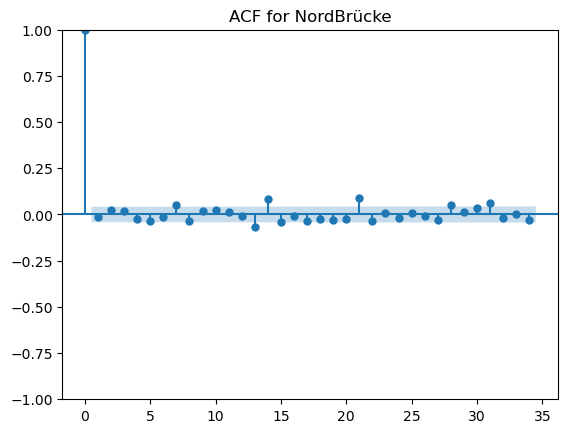

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


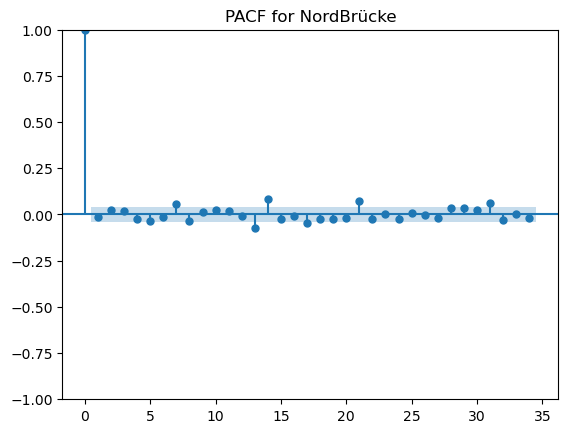

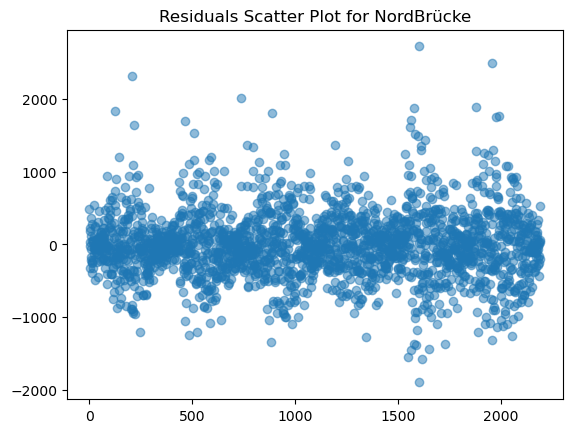

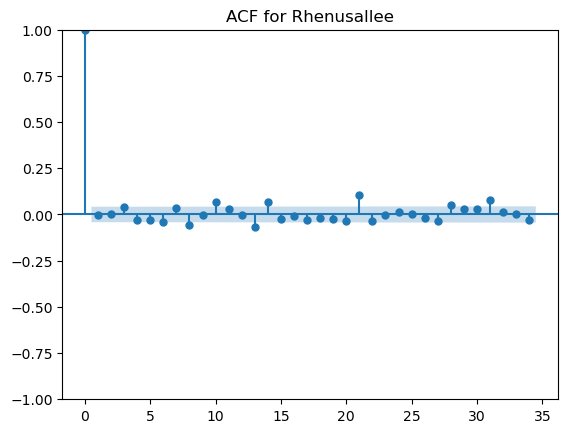

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


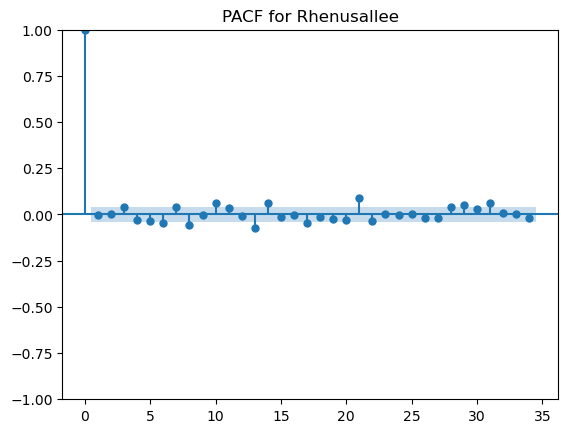

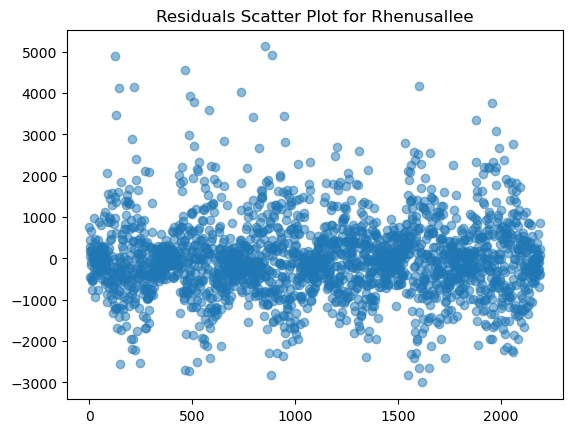

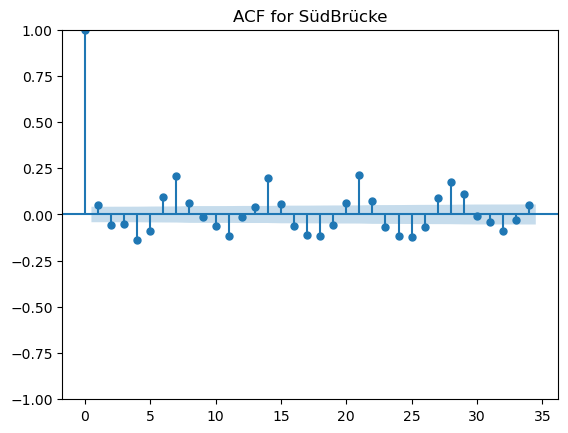

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


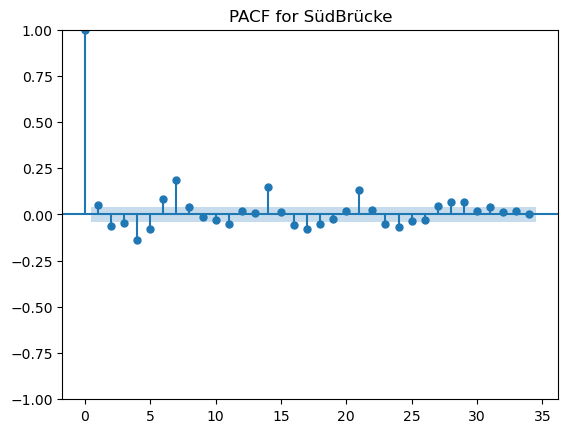

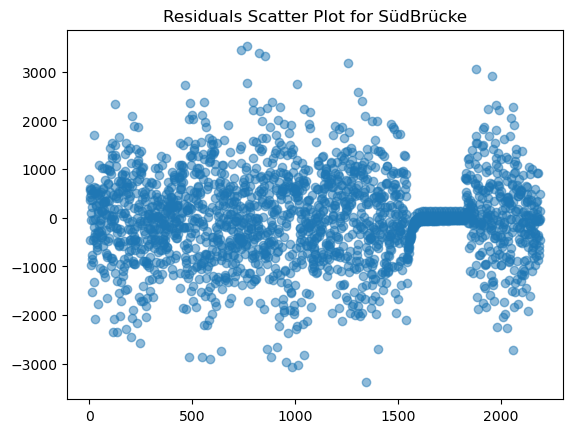

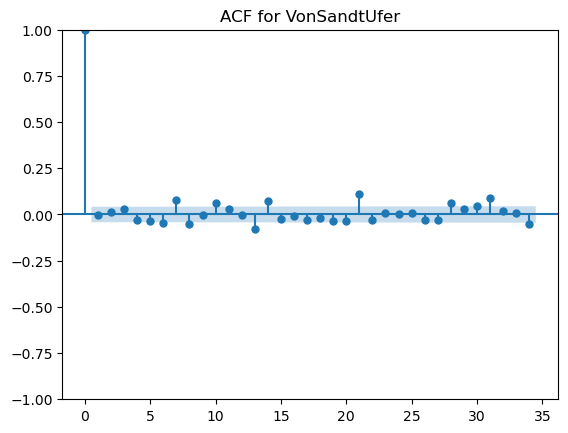

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


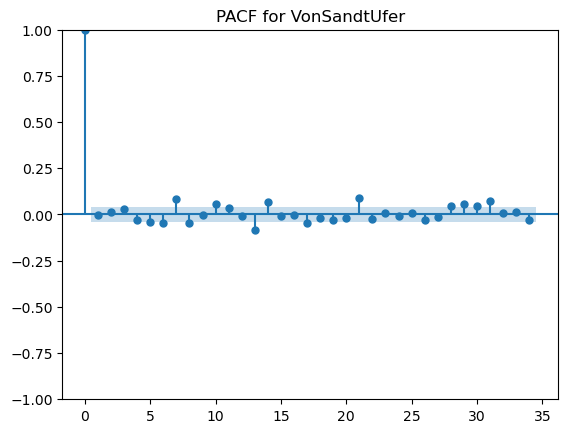

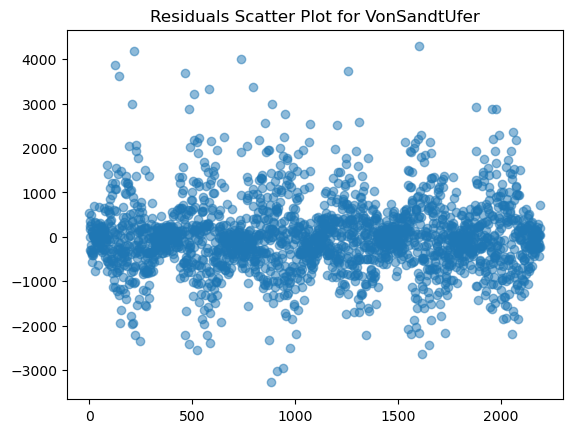

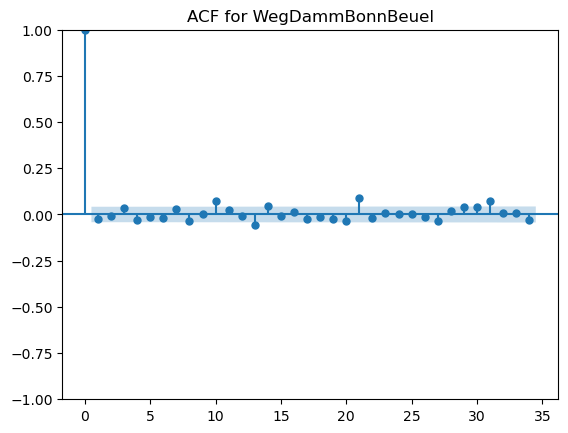

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


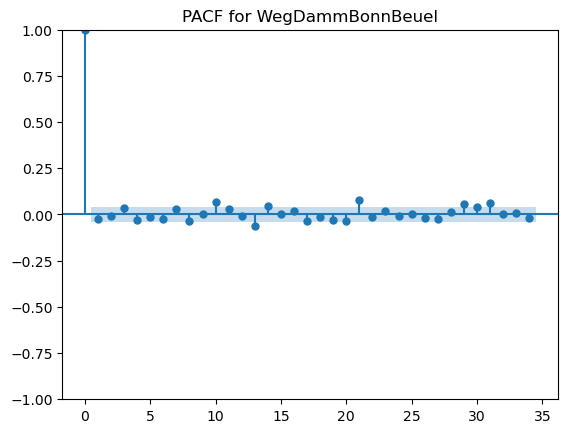

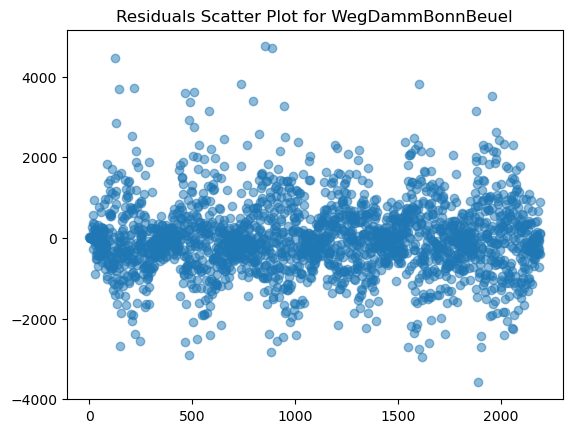

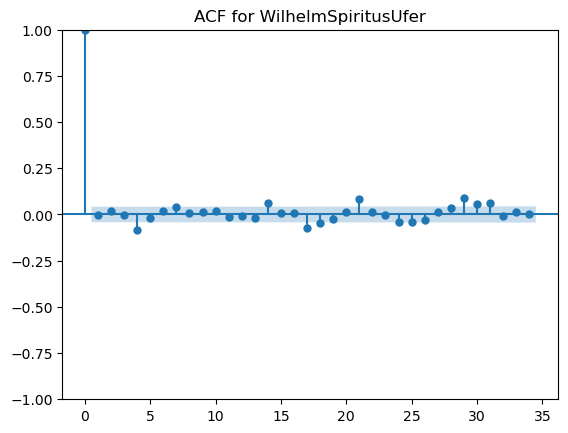

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


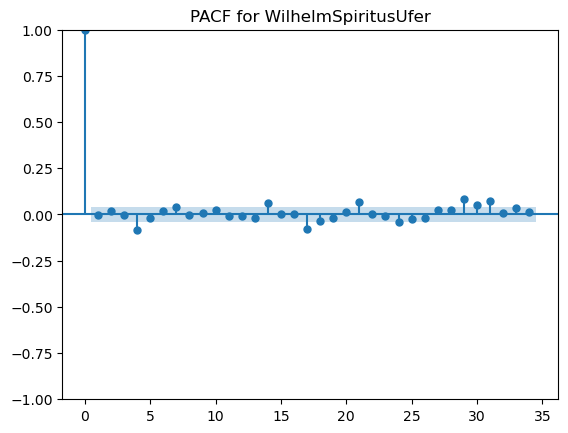

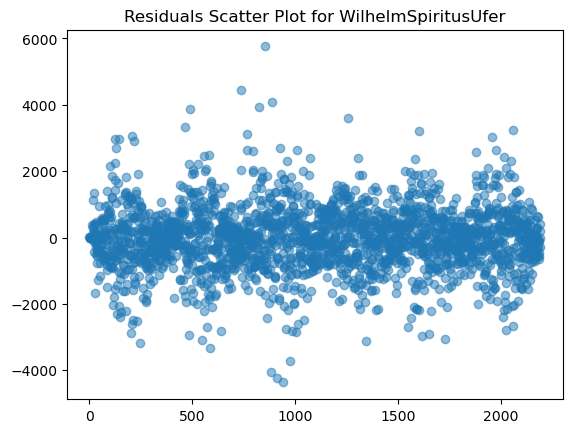

Diagnostics for BrühlerStraße:

Shapiro-Wilk Test: ShapiroResult(statistic=0.9979207515716553, pvalue=0.005930079147219658)

Ljung-Box Test:
        lb_stat      lb_pvalue
10  714.791929  4.189540e-147


Diagnostics for Estermannufer:

Shapiro-Wilk Test: ShapiroResult(statistic=0.9151672124862671, pvalue=2.213444658667836e-33)

Ljung-Box Test:
       lb_stat  lb_pvalue
10  43.994101   0.000003


Diagnostics for KennedyBrücke:

Shapiro-Wilk Test: ShapiroResult(statistic=0.9765280485153198, pvalue=1.6239220125398696e-18)

Ljung-Box Test:
        lb_stat     lb_pvalue
10  361.562457  1.398860e-71


Diagnostics for McCloyWeg:

Shapiro-Wilk Test: ShapiroResult(statistic=0.9251266717910767, pvalue=9.843348717443917e-32)

Ljung-Box Test:
       lb_stat     lb_pvalue
10  58.691691  6.403178e-09


Diagnostics for NordBrücke:

Shapiro-Wilk Test: ShapiroResult(statistic=0.9672461748123169, pvalue=6.305586601355989e-22)

Ljung-Box Test:
       lb_stat  lb_pvalue
10  18.091142   0.053446


Diagnost

In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

diagnostics = {}

for location, model in location_models.items():
    diagnostics[location] = {}
    
    plot_acf(model.resid, title=f'ACF for {location}')
    plt.show()
    plot_pacf(model.resid, title=f'PACF for {location}')
    plt.show()
    
    shapiro_test = shapiro(model.resid)
    diagnostics[location]['Shapiro-Wilk Test'] = shapiro_test
    
    ljung_box_test = acorr_ljungbox(model.resid, lags=[10], return_df=True)
    diagnostics[location]['Ljung-Box Test'] = ljung_box_test


    plt.scatter(x=range(len(model.resid)), y=model.resid, alpha=0.5)
    plt.title(f'Residuals Scatter Plot for {location}')
    plt.show()

for location in diagnostics:
    print(f'Diagnostics for {location}:\n')
    print('Shapiro-Wilk Test:', diagnostics[location]['Shapiro-Wilk Test'])
    print('\nLjung-Box Test:\n', diagnostics[location]['Ljung-Box Test'])
    print('\n')


## Re-fining the model: 

In [15]:
exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']

def fit_sarimax(location):
    train_data = df_daily['2016-01-01':'2021-12-31']
    model = SARIMAX(train_data[location],
                    exog=train_data[exog_variables],
                    order=(1, 0, 1), 
                    seasonal_order=(1, 0, 1, 24))
    return model.fit(disp=False)

location_models = {}

for location in df_daily.columns.difference(['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']):
    print(f"Fitting SARIMAX model for {location}")
    location_models[location] = fit_sarimax(location)


Fitting SARIMAX model for BrühlerStraße


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for Estermannufer


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for KennedyBrücke


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for McCloyWeg


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for NordBrücke


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for Rhenusallee


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for SüdBrücke


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for VonSandtUfer


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for WegDammBonnBeuel


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting SARIMAX model for WilhelmSpiritusUfer


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostic Plots for BrühlerStraße


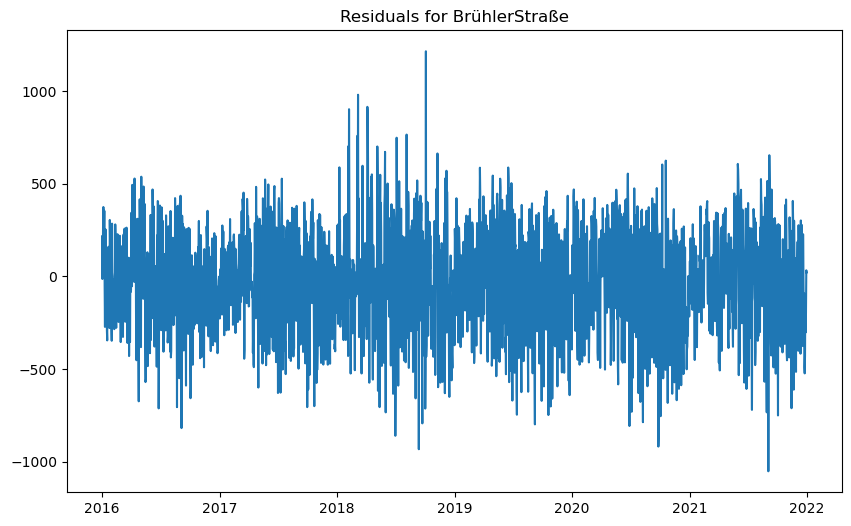

Diagnostic Plots for Estermannufer


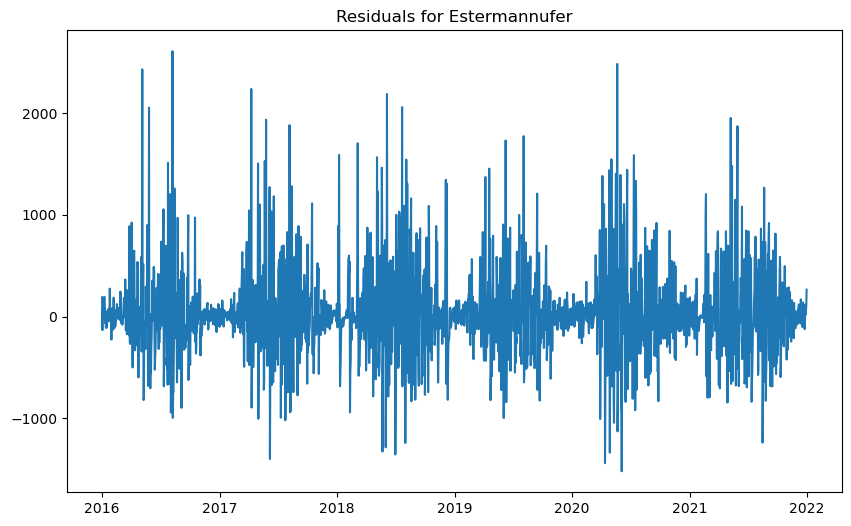

Diagnostic Plots for KennedyBrücke


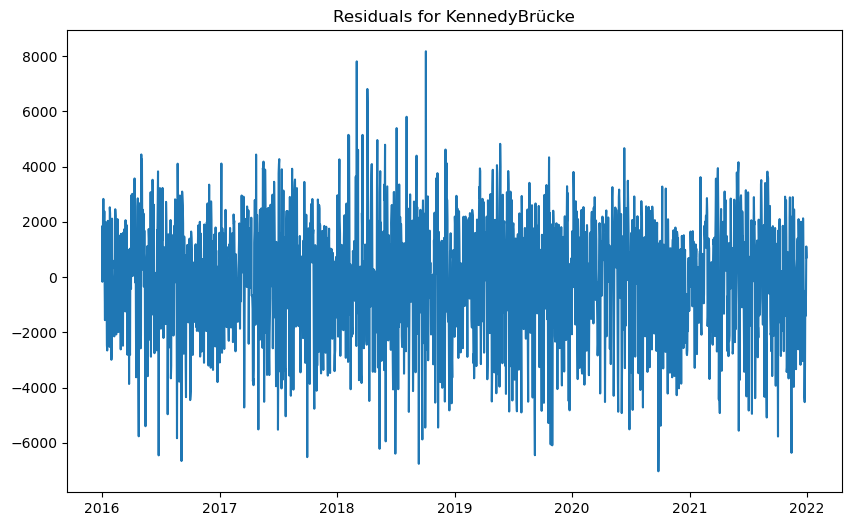

Diagnostic Plots for McCloyWeg


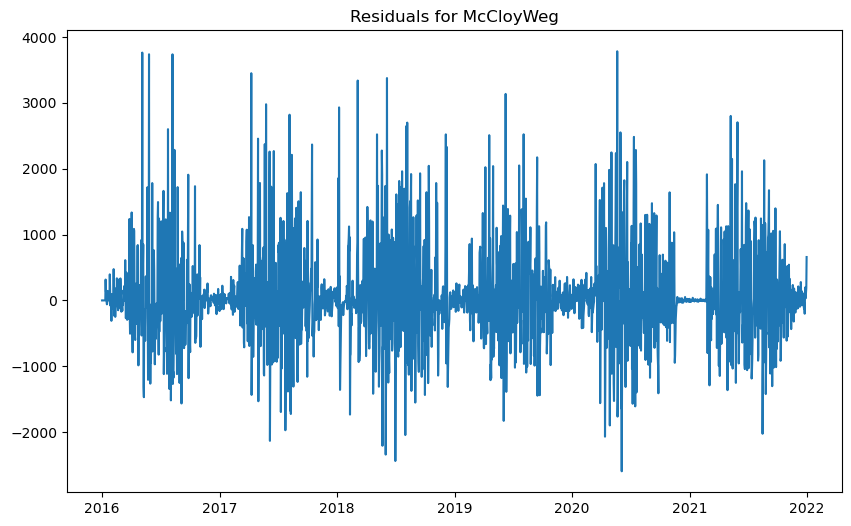

Diagnostic Plots for NordBrücke


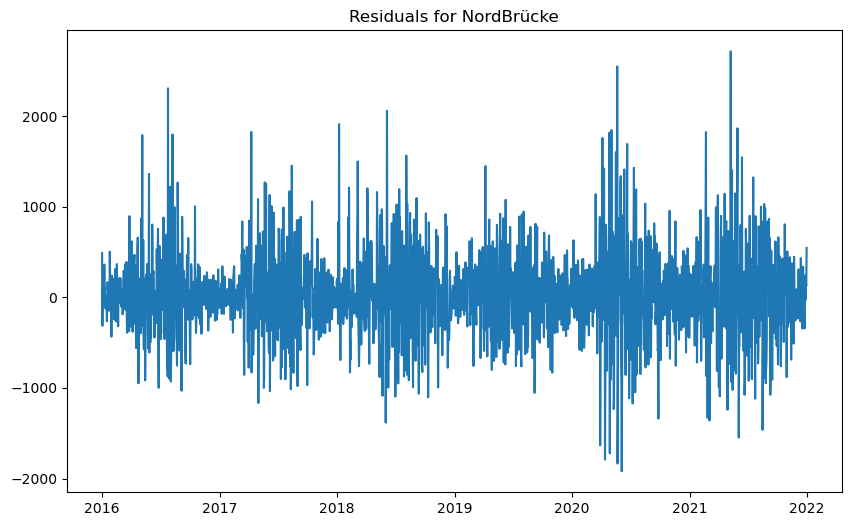

Diagnostic Plots for Rhenusallee


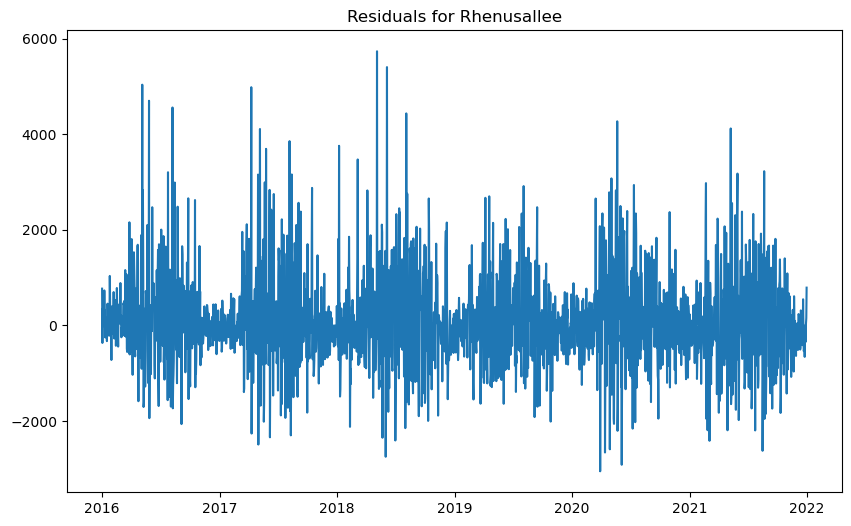

Diagnostic Plots for SüdBrücke


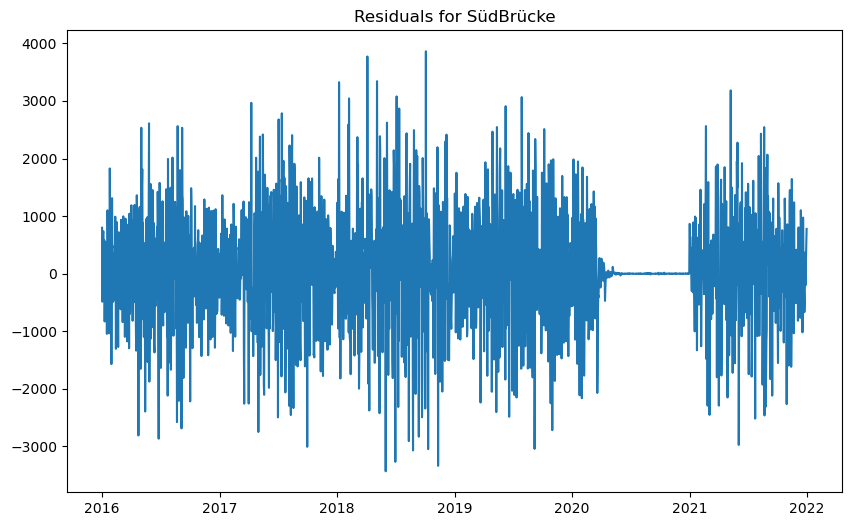

Diagnostic Plots for VonSandtUfer


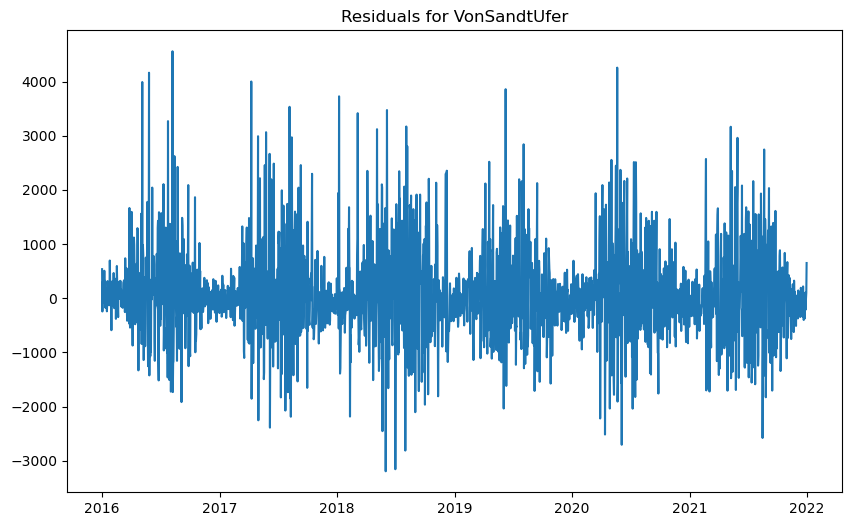

Diagnostic Plots for WegDammBonnBeuel


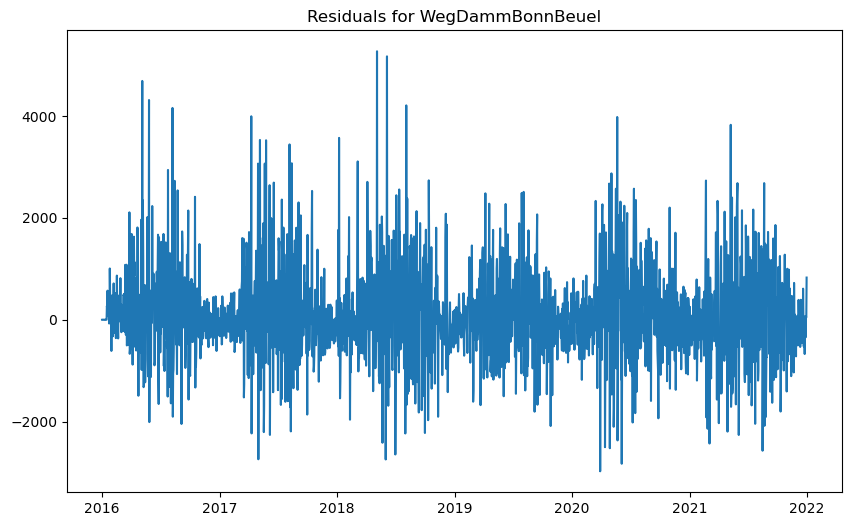

Diagnostic Plots for WilhelmSpiritusUfer


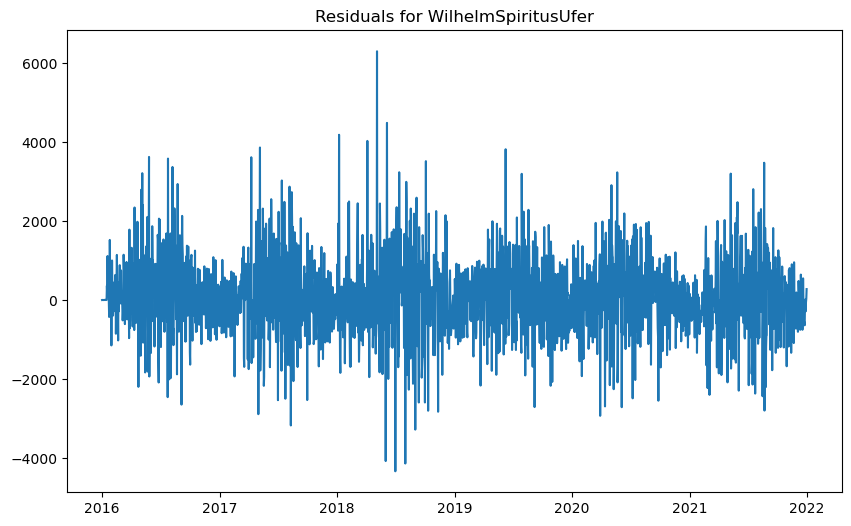

In [16]:
for location, model in location_models.items():
    print(f"Diagnostic Plots for {location}")

    # Residuals plot
    residuals = model.resid
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title(f'Residuals for {location}')
    plt.show()


## Transforming the data:

In [18]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox
from scipy.special import inv_boxcox


exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']

def fit_sarimax(location):
    train_data = df_daily['2016-01-01':'2021-12-31']
    

    #Transformation
    train_data[location], lambda_ = boxcox(train_data[location] + 1) 
    
    model = SARIMAX(train_data[location],
                    exog=train_data[exog_variables],
                    order=(1, 0, 1), 
                    seasonal_order=(1, 0, 1, 24))
    fitted_model = model.fit(disp=False)
    return fitted_model, lambda_



In [20]:
location_models = {}
lambda_values = {}

for location in df_daily.columns.difference(['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)', 'Datetime']):
    print(f"Fitting SARIMAX model for {location}")
    location_models[location], lambda_values[location] = fit_sarimax(location)




Fitting SARIMAX model for BrühlerStraße


C:\Users\bough\AppData\Local\Temp\ipykernel_38740\4083108465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[location], lambda_ = boxcox(train_data[location] + 1)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

Fitting SARIMAX model for Estermannufer


C:\Users\bough\AppData\Local\Temp\ipykernel_38740\4083108465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[location], lambda_ = boxcox(train_data[location] + 1)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

Fitting SARIMAX model for KennedyBrücke


C:\Users\bough\AppData\Local\Temp\ipykernel_38740\4083108465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[location], lambda_ = boxcox(train_data[location] + 1)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

Fitting SARIMAX model for McCloyWeg


C:\Users\bough\AppData\Local\Temp\ipykernel_38740\4083108465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[location], lambda_ = boxcox(train_data[location] + 1)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Fitting SARIMAX model for NordBrücke


C:\Users\bough\AppData\Local\Temp\ipykernel_38740\4083108465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[location], lambda_ = boxcox(train_data[location] + 1)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

Fitting SARIMAX model for Rhenusallee


C:\Users\bough\AppData\Local\Temp\ipykernel_38740\4083108465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[location], lambda_ = boxcox(train_data[location] + 1)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

Fitting SARIMAX model for SüdBrücke


C:\Users\bough\AppData\Local\Temp\ipykernel_38740\4083108465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[location], lambda_ = boxcox(train_data[location] + 1)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

Fitting SARIMAX model for VonSandtUfer


C:\Users\bough\AppData\Local\Temp\ipykernel_38740\4083108465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[location], lambda_ = boxcox(train_data[location] + 1)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Fitting SARIMAX model for WegDammBonnBeuel


C:\Users\bough\AppData\Local\Temp\ipykernel_38740\4083108465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[location], lambda_ = boxcox(train_data[location] + 1)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

Fitting SARIMAX model for WilhelmSpiritusUfer


C:\Users\bough\AppData\Local\Temp\ipykernel_38740\4083108465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[location], lambda_ = boxcox(train_data[location] + 1)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

Diagnostic Plots for BrühlerStraße


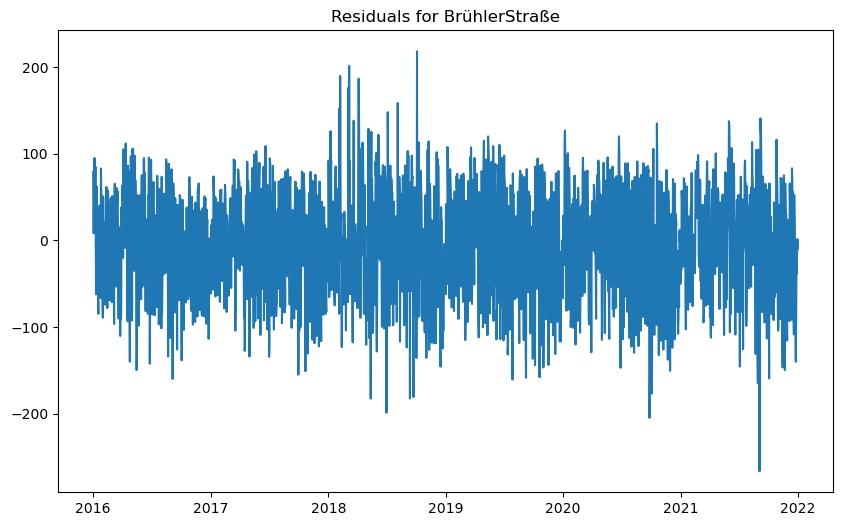

Diagnostic Plots for Estermannufer


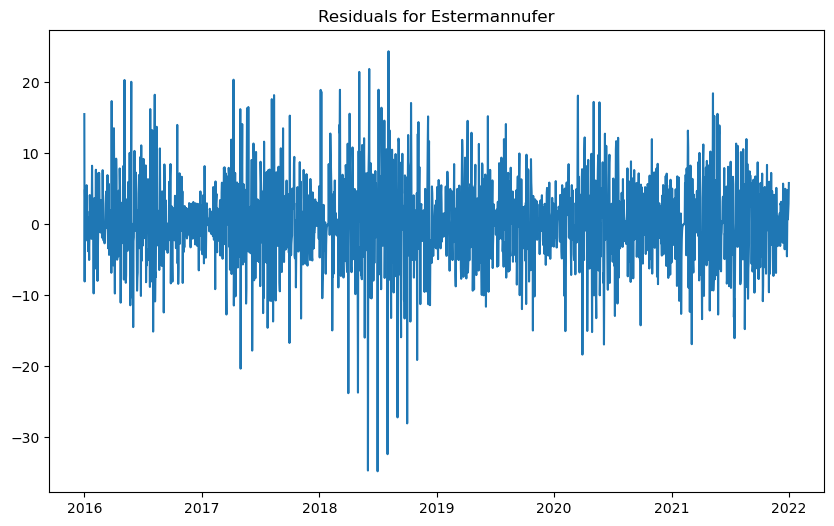

Diagnostic Plots for KennedyBrücke


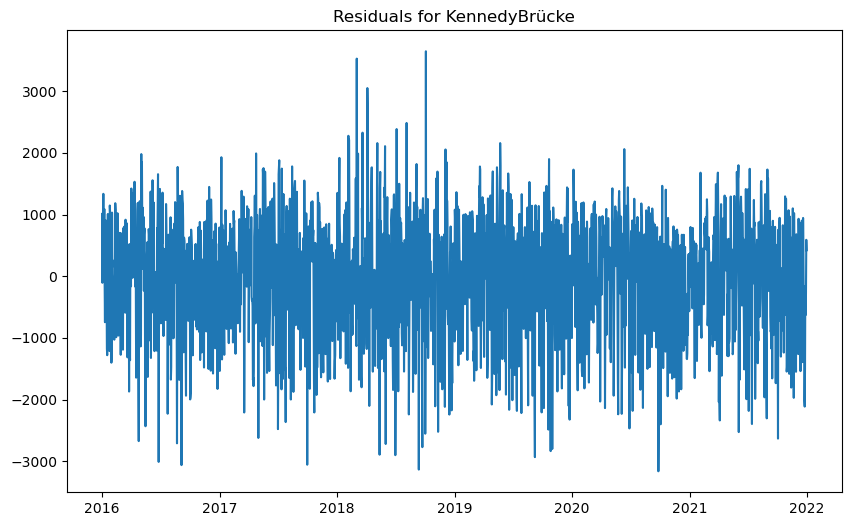

Diagnostic Plots for McCloyWeg


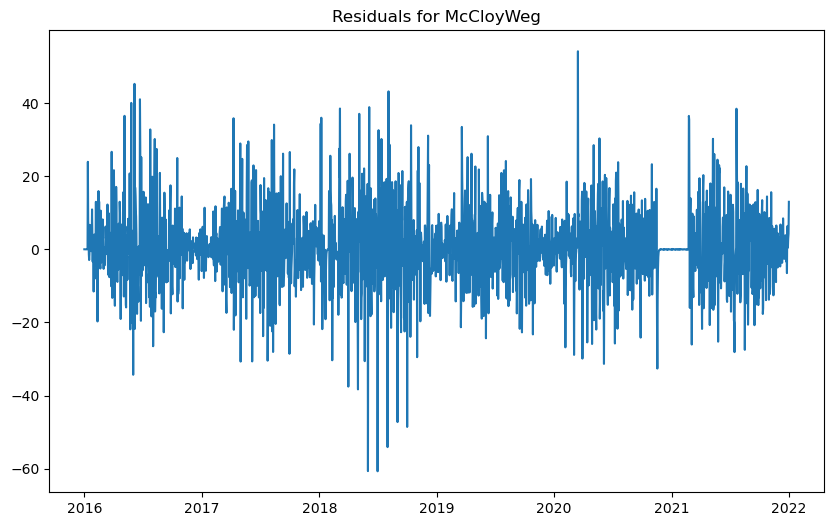

Diagnostic Plots for NordBrücke


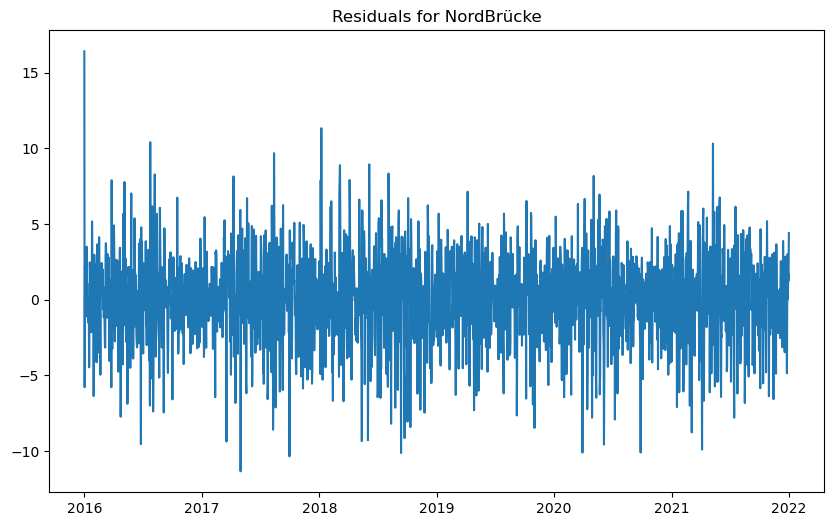

Diagnostic Plots for Rhenusallee


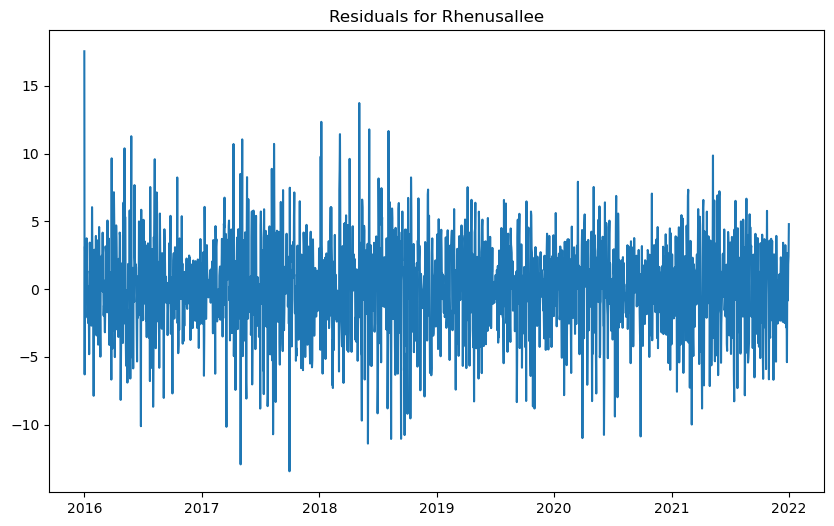

Diagnostic Plots for SüdBrücke


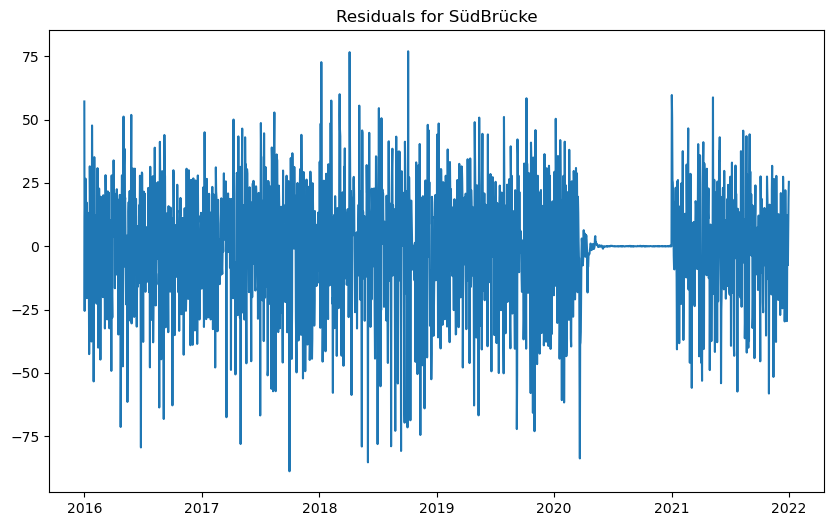

Diagnostic Plots for VonSandtUfer


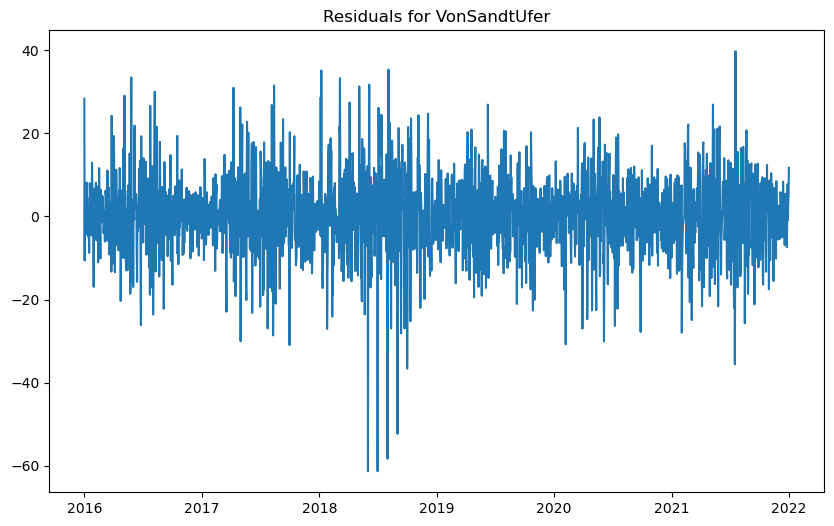

Diagnostic Plots for WegDammBonnBeuel


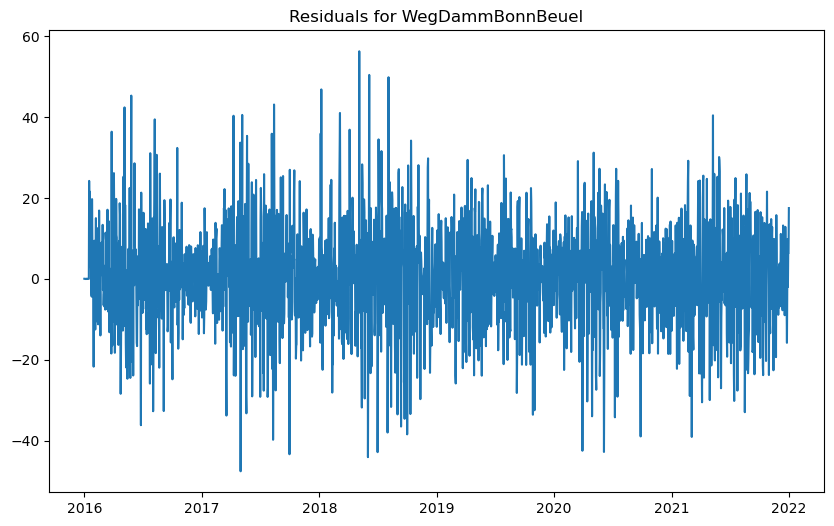

Diagnostic Plots for WilhelmSpiritusUfer


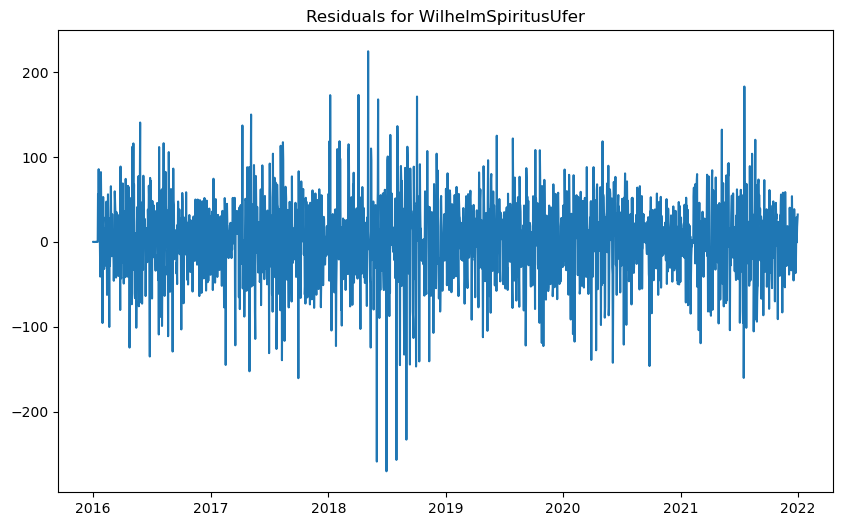

In [21]:
for location, model in location_models.items():
    print(f"Diagnostic Plots for {location}")

    residuals = model.resid
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title(f'Residuals for {location}')
    plt.show()


In [25]:
test_data= df_daily['2022-01-01':'2022-12-31']

columns_to_drop = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']

test_data = test_data.drop(columns=columns_to_drop)

test_data

KennedyBrücke  NordBrücke  SüdBrücke  Estermannufer  VonSandtUfer  \
Datetime                                                                        
2022-01-01         3261.0      1226.0     2090.0          585.0        1447.0   
2022-01-02         3020.0      1012.0     1799.0          407.0        1239.0   
2022-01-03         4674.0       545.0     1208.0          190.0         490.0   
2022-01-04         3775.0       403.0      829.0          139.0         370.0   
2022-01-05         4848.0       571.0     1351.0          104.0         565.0   
...                   ...         ...        ...            ...           ...   
2022-12-27         4270.0       764.0      543.0          269.0         710.0   
2022-12-28         3927.0       534.0      418.0          226.0         552.0   
2022-12-29         4281.0       613.0      527.0          220.0         567.0   
2022-12-30         3654.0       429.0      346.0          129.0         410.0   
2022-12-31         3031.0       543.0      494.0          224.0         680.0   

            Rhenusallee  BrühlerStraße  WilhelmSpiritusUfer  McCloyWeg  \
Datetime                                                                 
2022-01-01       2061.0          330.0               1757.0     1043.0   
2022-01-02       1638.0          297.0               1532.0      904.0   
2022-01-03        743.0          576.0               1008.0      342.0   
2022-01-04        475.0          415.0                752.0      213.0   
2022-01-05        838.0          595.0               1098.0      124.0   
...                 ...            ...                  ...        ...   
2022-12-27          0.0          556.0               1096.0      563.0   
2022-12-28          0.0          484.0                916.0      401.0   
2022-12-29          0.0          478.0                993.0      435.0   
2022-12-30          0.0          477.0                683.0      299.0   
2022-12-31          0.0          374.0                833.0      618.0   

            WegDammBonnBeuel  
Datetime                      
2022-01-01            1926.0  
2022-01-02            1533.0  
2022-01-03             775.0  
2022-01-04             525.0  
2022-01-05             774.0  
...                      ...  
2022-12-27            1078.0  
2022-12-28             757.0  
2022-12-29             894.0  
2022-12-30             644.0  
2022-12-31            1022.0  

[365 rows x 10 columns]

In [29]:


def forecast_and_invert(location, steps, exog_data):


    forecast = location_models[location].get_forecast(steps=steps, exog=exog_data)
    forecast_values = forecast.predicted_mean
    
    
    forecast_values_original_scale = inv_boxcox(forecast_values, lambda_values[location])
    
    return forecast_values_original_scale


future_exog_data = df_daily['2022-01-01':'2022-12-31']
columns_to_drop= ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']
future_exog_data = future_exog_data.drop(columns=columns_to_drop)
 

location_name = 'NordBrücke'  
forecasted_values_original_scale = forecast_and_invert(location_name, 30, future_exog_data.loc[:, exog_variables])


ValueError: Provided exogenous values are not of the appropriate shape. Required (30, 3), got (365, 3).